In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Datasets/ISIC2018Task3.zip

Streaming output truncated to the last 5000 lines.
  inflating: ISIC2018Task3/ISIC2018Task3/train/ISIC_0029526.jpg  
  inflating: ISIC2018Task3/ISIC2018Task3/train/ISIC_0029527.jpg  
  inflating: ISIC2018Task3/ISIC2018Task3/train/ISIC_0029528.jpg  
  inflating: ISIC2018Task3/ISIC2018Task3/train/ISIC_0029529.jpg  
  inflating: ISIC2018Task3/ISIC2018Task3/train/ISIC_0029530.jpg  
  inflating: ISIC2018Task3/ISIC2018Task3/train/ISIC_0029531.jpg  
  inflating: ISIC2018Task3/ISIC2018Task3/train/ISIC_0029532.jpg  
  inflating: ISIC2018Task3/ISIC2018Task3/train/ISIC_0029533.jpg  
  inflating: ISIC2018Task3/ISIC2018Task3/train/ISIC_0029534.jpg  
  inflating: ISIC2018Task3/ISIC2018Task3/train/ISIC_0029535.jpg  
  inflating: ISIC2018Task3/ISIC2018Task3/train/ISIC_0029536.jpg  
  inflating: ISIC2018Task3/ISIC2018Task3/train/ISIC_0029537.jpg  
  inflating: ISIC2018Task3/ISIC2018Task3/train/ISIC_0029538.jpg  
  inflating: ISIC2018Task3/ISIC2018Task3/train/ISIC_0029539.jpg  
  inflating: ISIC2018Task

In [3]:
import pandas as pd
train = pd.read_csv('/content/ISIC2018Task3/ISIC2018Task3/labels/train.csv', header=0)

In [4]:
train.head(10)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ISIC_0024311,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,ISIC_0024312,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,ISIC_0024313,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ISIC_0024314,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,ISIC_0024315,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train['class'] = train[['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']].values.argmax(1)

In [6]:
train.head(10)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC,class
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,ISIC_0024311,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
6,ISIC_0024312,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
7,ISIC_0024313,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,ISIC_0024314,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
9,ISIC_0024315,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
train.shape

(10015, 9)

In [8]:
class_labels = {
    0:'MEL',
    1:'NV',
    2:'BCC',
    3:'AKIEC',
    4:'BKL',
    5:'DF',
    6:'VASC'
}

In [9]:
train_mapped = train['class'].replace(class_labels)

In [10]:
train_mapped

0         NV
1         NV
2         NV
3         NV
4        MEL
        ... 
10010    MEL
10011    MEL
10012    BKL
10013     NV
10014     NV
Name: class, Length: 10015, dtype: object

In [11]:
train['class'].value_counts()

class
1    6705
0    1113
4    1099
2     514
3     327
6     142
5     115
Name: count, dtype: int64

In [12]:
train['class'].value_counts(normalize=True)

class
1    0.669496
0    0.111133
4    0.109735
2    0.051323
3    0.032651
6    0.014179
5    0.011483
Name: proportion, dtype: float64

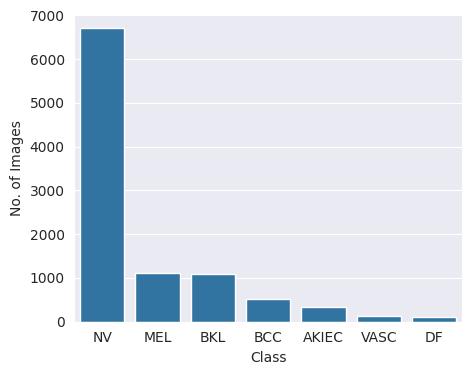

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(5,4))
sns.barplot(train_mapped.value_counts())
ax.set_xlabel('Class')
ax.set_ylabel('No. of Images')
sns.set_style('white')

In [14]:
train['image'].values

array(['ISIC_0024306', 'ISIC_0024307', 'ISIC_0024308', ...,
       'ISIC_0034318', 'ISIC_0034319', 'ISIC_0034320'], dtype=object)

In [15]:
import os
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
import torchvision
from torchvision.io import read_image

class ISIC2018Task3Dataset(Dataset):
  """ Custom class for ISIC 2018 Task 3 dataset. """

  def __init__(self, image_dir, csv_path, transform=None):
    """ Initialise dataset class.

    Args:
      image_dir (str): Path to image directory.
      csv_path (str): Path to csv file containing image name with class labels.
      transform (callable, optional): Optional transformations to apply on samples.
    """
    self.image_dir = image_dir
    self.csv_path = csv_path
    self.transform = transform
    df = pd.read_csv(csv_path, header=0)
    # Get class labels as label encoded not one-hot encoded
    df['class'] = df[['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']].values.argmax(1)
    self.image_names = df['image'].values
    self.image_labels = df['class'].values

  def __len__(self):
    """ Returns number of samples in dataset. """
    return len(self.image_names)

  def __getitem__(self, idx):
    """ Returns dictionary containing the image as key and class label as value. """
    image_path = os.path.join(self.image_dir, self.image_names[idx] + '.jpg')
    image = read_image(image_path)
    label = self.image_labels[idx]

    if self.transform is not None:
      image = self.transform(image)

    return image, label

In [16]:
from torchvision.transforms import v2
test_trans = v2.Compose([
    v2.CenterCrop(size=450),
    v2.Resize((224,224)),
    v2.ToDtype(torch.float32, scale=False),
])

In [17]:
val = ISIC2018Task3Dataset(image_dir='/content/ISIC2018Task3/ISIC2018Task3/val', csv_path='/content/ISIC2018Task3/ISIC2018Task3/labels/val.csv')
train_crop_resize = ISIC2018Task3Dataset(image_dir='/content/ISIC2018Task3/ISIC2018Task3/train', csv_path='/content/ISIC2018Task3/ISIC2018Task3/labels/train.csv', transform=test_trans)

torch.Size([3, 450, 600])
torch.Size([3, 224, 224])


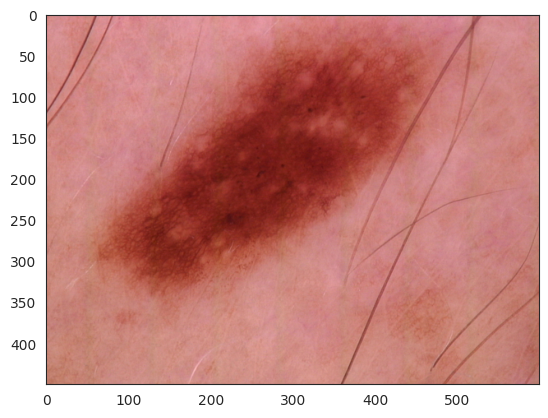

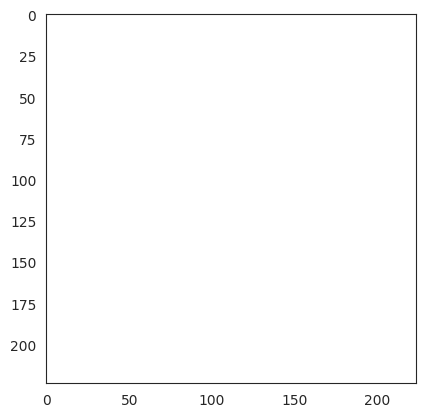

In [18]:
import matplotlib.pyplot as plt
sample_img, label = val[1]
transformed_sample = test_trans(sample_img)
print(sample_img.shape)
print(transformed_sample.shape)
fig, ax = plt.subplots()
plt.imshow(sample_img.permute(1, 2, 0))
fig, ax = plt.subplots()
plt.imshow(transformed_sample.permute(1, 2, 0))

0 torch.Size([3, 450, 600]) 1
1 torch.Size([3, 450, 600]) 1
2 torch.Size([3, 450, 600]) 2
3 torch.Size([3, 450, 600]) 1
4 torch.Size([3, 450, 600]) 1


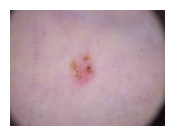

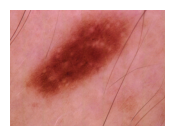

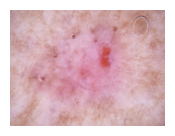

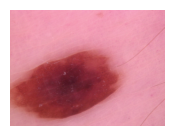

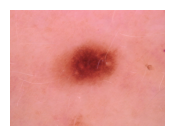

In [19]:
import matplotlib.pyplot as plt

for i, sample in enumerate(val):
  image, label = sample
  print(i, image.shape, label)
  fig, ax = plt.subplots(figsize=(2,2))
  ax.axis('off')
  plt.imshow(image.permute(1, 2, 0))

  if i == 4:
    break

In [20]:
# from tqdm import tqdm
# mean_list = []
# std_list = []
# # Get mean and standard deviation for all images in train data across the 3 channels
# for image_label_pair in tqdm(train_crop_resize):
#     image = image_label_pair[0]
#     mean_list.append(torch.mean(image, dim=(1,2)))
#     std_list.append(torch.std(image, dim=(1,2)))

In [21]:
# # Get mean of means
# np.mean(mean_list, axis=0)

In [22]:
# # Get mean of standard deviation
# np.mean(std_list, axis=0)

In [23]:
import torch
import torch.nn as nn
from torchvision.models import efficientnet_b0, mnasnet1_0, mobilenet_v3_large, resnext101_64x4d

test_input = torch.randn(20, 3, 224, 224)

# AlexNet
AlexNet = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1),
    nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1),
    nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    nn.Linear(in_features=6400, out_features=4096),
    nn.Linear(in_features=4096, out_features=4096),
    nn.Linear(in_features=4096, out_features=7)
)

# EfficientNetB0
EfficientNetB0 = efficientnet_b0(weights='IMAGENET1K_V1')
EfficientNetB0.classifier[1] = nn.Linear(in_features=EfficientNetB0.classifier[1].in_features, out_features=7, bias=True)
# Freeze
Efficient_freeze = efficientnet_b0(weights='IMAGENET1K_V1')
for param in Efficient_freeze.parameters():
    param.requires_grad = False
Efficient_freeze.classifier[1] = nn.Linear(in_features=Efficient_freeze.classifier[1].in_features, out_features=7, bias=True)

# MNASNet
MNASNet = mnasnet1_0(weights='IMAGENET1K_V1')
MNASNet.classifier[1] = nn.Linear(in_features=MNASNet.classifier[1].in_features, out_features=7, bias=True)
# Freeze
MNAS_freeze = mnasnet1_0(weights='IMAGENET1K_V1')
for param in MNAS_freeze.parameters():
    param.requires_grad = False
MNAS_freeze.classifier[1] = nn.Linear(in_features=MNAS_freeze.classifier[1].in_features, out_features=7, bias=True)

# MobileNetV3 Large
MobileNetV3 = mobilenet_v3_large(weights='IMAGENET1K_V1')
MobileNetV3.classifier[3] = nn.Linear(in_features=MobileNetV3.classifier[3].in_features, out_features=7, bias=True)
# Freeze
MobileNetV3_freeze = mobilenet_v3_large(weights='IMAGENET1K_V1')
for param in MobileNetV3_freeze.parameters():
    param.requires_grad = False
MobileNetV3_freeze.classifier[3] = nn.Linear(in_features=MobileNetV3_freeze.classifier[3].in_features, out_features=7, bias=True)

# ResNeXt
ResNeXt101 = resnext101_64x4d(weights='IMAGENET1K_V1')
ResNeXt101.fc = nn.Linear(in_features=ResNeXt101.fc.in_features, out_features=7, bias=True)
# Freeze
ResNeXt_freeze = resnext101_64x4d(weights='IMAGENET1K_V1')
for param in ResNeXt_freeze.parameters():
    param.requires_grad = False
ResNeXt_freeze.fc = nn.Linear(in_features=ResNeXt_freeze.fc.in_features, out_features=7, bias=True)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 59.8MB/s]
Downloading: "https://download.pytorch.org/models/mnasnet1.0_top1_73.512-f206786ef8.pth" to /root/.cache/torch/hub/checkpoints/mnasnet1.0_top1_73.512-f206786ef8.pth
100%|██████████| 16.9M/16.9M [00:00<00:00, 108MB/s] 
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 101MB/s]
Downloading: "https://download.pytorch.org/models/resnext101_64x4d-173b62eb.pth" to /root/.cache/torch/hub/checkpoints/resnext101_64x4d-173b62eb.pth
100%|██████████| 319M/319M [00:02<00:00, 132MB/s]


In [24]:
output = AlexNet(test_input)

In [25]:
output.shape

torch.Size([20, 7])

In [26]:
# Define loss function
if torch.cuda.is_available:
    loss_func = nn.CrossEntropyLoss(weight=torch.tensor([1/1113, 1/6705, 1/514, 1/327, 1/1099, 1/115, 1/142]).to('cuda'))
else:
    loss_func = nn.CrossEntropyLoss(weight=torch.tensor([1/1113, 1/6705, 1/514, 1/327, 1/1099, 1/115, 1/142]))

test_loss = nn.CrossEntropyLoss()

In [27]:
# Transforms
from torchvision.transforms import v2

# Mean and std for normalisation
means = [194.7717 , 137.25015, 143.20988]
stds = [22.315918, 30.71689 , 34.64285]

# Crop and resize transform
crop_resize = v2.Compose([
    v2.CenterCrop(size=450),
    v2.Resize((224,224)),
    v2.ToDtype(torch.float32, scale=False)
])

crop_resize_normal = v2.Compose([
    v2.CenterCrop(size=450),
    v2.Resize((224,224)),
    v2.ToDtype(torch.float32, scale=False),
    v2.Normalize(mean=means, std=stds)
])

# Most common transforms
common_transforms = v2.Compose([
    v2.CenterCrop(size=450),
    v2.RandomRotation(degrees=(0, 360)),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomVerticalFlip(p=0.5),
    v2.RandomCrop(size=(224, 224)),
    v2.ColorJitter(brightness=0.25, contrast=0.25),
    v2.ToDtype(torch.float32, scale=False),
    v2.Normalize(mean=means, std=stds)
])

quick_test = v2.Compose([
    v2.CenterCrop(size=450),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomVerticalFlip(p=0.5),
    v2.ColorJitter(brightness=0.25, contrast=0.25),
    v2.Resize((224,224)),
    v2.ToDtype(torch.float32, scale=False),
    v2.Normalize(mean=means, std=stds)
])

In [28]:
train_data = ISIC2018Task3Dataset(image_dir='/content/ISIC2018Task3/ISIC2018Task3/train', csv_path='/content/ISIC2018Task3/ISIC2018Task3/labels/train.csv', transform = crop_resize_normal)
augment_train_data = ISIC2018Task3Dataset(image_dir='/content/ISIC2018Task3/ISIC2018Task3/train', csv_path='/content/ISIC2018Task3/ISIC2018Task3/labels/train.csv', transform = quick_test)
val_data = ISIC2018Task3Dataset(image_dir='/content/ISIC2018Task3/ISIC2018Task3/val', csv_path='/content/ISIC2018Task3/ISIC2018Task3/labels/val.csv', transform=crop_resize_normal)
test_data = ISIC2018Task3Dataset(image_dir='/content/ISIC2018Task3/ISIC2018Task3/test', csv_path='/content/ISIC2018Task3/ISIC2018Task3/labels/test.csv', transform=crop_resize_normal)

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


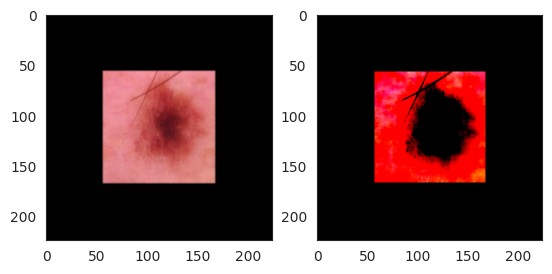

In [29]:
# Compare non-normalised and normalised images
import matplotlib.pyplot as plt
sample_img, label = train_crop_resize[0]
nonnormal_sample = crop_resize(sample_img)
nonnormal_sample = nonnormal_sample.to(torch.int)
normal_sample = crop_resize_normal(sample_img)
print(nonnormal_sample.shape)
print(normal_sample.shape)
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(nonnormal_sample.permute(1, 2, 0))
ax[1].imshow(normal_sample.permute(1, 2, 0))

In [30]:
# Dataloaders
from torch.utils.data import DataLoader
# Parameters
batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, pin_memory=True)
augment_train_loader = DataLoader(augment_train_data, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, pin_memory=True)

In [31]:
# Optimisers
from torch.optim import Adam, SGD

alex_adam = Adam(AlexNet.parameters(), lr=0.001)
eff_adam = Adam(EfficientNetB0.parameters(), lr=0.001)
eff_freeze_adam = Adam(Efficient_freeze.parameters(), lr=0.001)
mnas_adam = Adam(MNASNet.parameters(), lr=0.001)
mnas_freeze_adam = Adam(MNAS_freeze.parameters(), lr=0.001)
mobile_adam = Adam(MobileNetV3.parameters(), lr=0.001)
mobile_freeze_adam = Adam(MobileNetV3_freeze.parameters(), lr=0.001)
resnext_adam = Adam(ResNeXt101.parameters(), lr=0.001)
resnext_freeze_adam = Adam(ResNeXt_freeze.parameters(), lr=0.001)

In [32]:
# Scheduler
from torch.optim.lr_scheduler import LinearLR, CosineAnnealingLR

eff_adam_scheduler = CosineAnnealingLR(eff_adam, T_max=10, eta_min=0.0001)
eff_freeze_adam_scheduler = CosineAnnealingLR(eff_freeze_adam, T_max=10, eta_min=0.0001)
mobile_adam_scheduler = CosineAnnealingLR(mobile_adam, T_max=10, eta_min=0.0001)
mobile_freeze_adam_scheduler = CosineAnnealingLR(mobile_freeze_adam, T_max=10, eta_min=0.0001)
mnas_freeze_adam_scheduler = CosineAnnealingLR(mnas_freeze_adam, T_max=10, eta_min=0.0001)
resnext_freeze_adam_scheduler = CosineAnnealingLR(resnext_freeze_adam, T_max=10, eta_min=0.0001)

In [33]:
!pip install torcheval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 1.5 MB/s eta 0:00:00


In [34]:
# Metrics
import torch
from torcheval.metrics.functional import multiclass_accuracy, multiclass_precision, multiclass_recall, multiclass_auroc

# Training

In [35]:
import torch
import json
from tqdm import tqdm

def train(model, max_epochs, train_data, val_data, loss_func, optimiser, scheduler=None, early_stopping=None, metrics_path='./metrics.json', save_path='./best-model.pth'):
    # Check if can run on cuda
    if torch.cuda.is_available():
        device = 'cuda'
        model.cuda()
    else:
        device = 'cpu'
    # Tell user what device running on
    print(f'Running on {device}')
    # Default best accuracy and patience
    best_val_acc = 0
    patience = 0
    # Dictionary to keep track of metrics
    metrics = {
    'train_loss_per_epoch':[],
    'train_acc_per_epoch':[],
    'train_prec_per_epoch':[],
    'train_recall_per_epoch':[],
    'train_auroc_per_epoch':[],
    'val_loss_per_epoch':[],
    'val_acc_per_epoch':[],
    'val_prec_per_epoch':[],
    'val_recall_per_epoch':[],
    'val_auroc_per_epoch':[]
    }

    for epoch in range(max_epochs):
        train_loss = []
        train_acc = []
        train_prec = []
        train_recall = []
        train_auroc = []
        print(f'=== Epoch: {epoch + 1}/{max_epochs} ===')
        # Put model into train mode
        model.train()
        # Training
        for image, label in tqdm(train_data):
            # Move to device
            image, label = image.to(device), label.to(device)
            # Reset gradient
            optimiser.zero_grad()
            # Make predictions
            pred = model(image)
            # Calculate loss
            loss = loss_func(pred, label)
            # Backpropagation
            loss.backward()
            optimiser.step()
            # Calculate metrics
            acc = multiclass_accuracy(pred, label)
            prec = multiclass_precision(pred, label)
            recall = multiclass_recall(pred, label)
            auroc = multiclass_auroc(pred, label, num_classes=7)
            # Update metric arrays
            train_loss.append(loss.item())
            train_acc.append(acc.item())
            train_prec.append(prec.item())
            train_recall.append(recall.item())
            train_auroc.append(auroc.item())
        # Update scheduler if using
        if scheduler is not None:
            prev_lr = optimiser.param_groups[0]['lr']
            scheduler.step()
            new_lr = optimiser.param_groups[0]['lr']
            print(f'= Learning Rate {prev_lr} --> {new_lr} =')

        # Get average metrics per epoch
        avg_train_loss = sum(train_loss) / len(train_loss)
        avg_train_acc = sum(train_acc) / len(train_acc)
        avg_train_prec = sum(train_prec) / len(train_prec)
        avg_train_recall = sum(train_recall) / len(train_recall)
        avg_train_auroc = sum(train_auroc) / len(train_auroc)
        metrics['train_loss_per_epoch'].append(avg_train_loss)
        metrics['train_acc_per_epoch'].append(avg_train_acc)
        metrics['train_prec_per_epoch'].append(avg_train_prec)
        metrics['train_recall_per_epoch'].append(avg_train_recall)
        metrics['train_auroc_per_epoch'].append(avg_train_auroc)

        # Validation
        # Put model into eval mode
        model.eval()
        val_loss = []
        val_acc = []
        val_prec = []
        val_recall = []
        val_auroc = []

        for image, label in tqdm(val_data):
            # Move to device
            image, label = image.to(device), label.to(device)
            # Don't calculate gradient
            with torch.no_grad():
                # Make predictions
                pred = model(image)
                # Calculate loss
                loss = loss_func(pred, label)
                # Calculate metrics
                acc = multiclass_accuracy(pred, label)
                prec = multiclass_precision(pred, label)
                recall = multiclass_recall(pred, label)
                auroc = multiclass_auroc(pred, label, num_classes=7)
                # Update metric arrays
                val_loss.append(loss.item())
                val_acc.append(acc.item())
                val_prec.append(prec.item())
                val_recall.append(recall.item())
                val_auroc.append(auroc.item())
            # Get average metrics per epoch
        avg_val_loss = sum(val_loss) / len(val_loss)
        avg_val_acc = sum(val_acc) / len(val_acc)
        avg_val_prec = sum(val_prec) / len(val_prec)
        avg_val_recall = sum(val_recall) / len(val_recall)
        avg_val_auroc = sum(val_auroc) / len(val_auroc)
        metrics['val_loss_per_epoch'].append(avg_val_loss)
        metrics['val_acc_per_epoch'].append(avg_val_acc)
        metrics['val_prec_per_epoch'].append(avg_val_prec)
        metrics['val_recall_per_epoch'].append(avg_val_recall)
        metrics['val_auroc_per_epoch'].append(avg_val_auroc)

        # If val accuracy improved, save model and set patience to 0
        # Else increase patience by 1
        if avg_val_acc > best_val_acc:
            best_val_acc = avg_val_acc
            torch.save(model.state_dict(), save_path)
            patience = 0
        else:
            patience += 1

        # Print status
        print(f'=== Train: loss={round(avg_train_loss, 5)}, acc={round(avg_train_acc, 5)}, prec={round(avg_train_prec, 5)}, rec={round(avg_train_recall, 5)}, auroc={round(avg_train_auroc, 5)} ==='
        + f'\n === Val: loss={round(avg_val_loss, 5)}, acc={round(avg_val_acc, 5)}, prec={round(avg_val_prec, 5)}, rec={round(avg_val_recall, 5)}, auroc={round(avg_val_auroc, 5)} ==='
        )

        # Check for early stopping
        if early_stopping is not None:
            if patience > early_stopping:
                highest_acc = max(metrics['val_acc_per_epoch'])
                highest_acc_epoch = np.argmax(metrics['val_acc_per_epoch']) + 1
                print(f'=== Early Stopping Triggered. Highest Validation Acc: {highest_acc} at epoch {highest_acc_epoch} ===')
                # Save metrics dict as json
                with open(metrics_path, 'w') as file:
                    json.dump(metrics, file)
                # End training
                break

    # Save metrics dict as json for later plotting
    with open(metrics_path, 'w') as file:
        json.dump(metrics, file)

In [36]:
# train(MobileNetV3, 400, train_loader, val_loader, test_loss, mobile_adam, scheduler=mobile_adam_scheduler, early_stopping=20, metrics_path='./testloss_mobile_default_adam_metrics.json', save_path='./testloss_mobile_default_adam.pth')

In [37]:
# train(Efficient_freeze, 400, augment_train_loader, val_loader, loss_func, eff_freeze_adam, scheduler=eff_freeze_adam_scheduler, early_stopping=20, metrics_path='./weightloss_eff_freeze_augmenttest_adam_metrics.json', save_path='./weightloss_eff_freeze_augmenttest_adam.pth')

In [38]:
# train(MNAS_freeze, 400, augment_train_loader, val_loader, loss_func, mnas_freeze_adam, scheduler=mnas_freeze_adam_scheduler, early_stopping=20, metrics_path='./weightloss_mnas_freeze_augmenttest_adam_metrics.json', save_path='./weightloss_mnas_freeze_augmenttest_adam.pth')

In [39]:
# train(ResNeXt_freeze, 400, augment_train_loader, val_loader, loss_func, resnext_freeze_adam, scheduler=resnext_freeze_adam_scheduler, early_stopping=20, metrics_path='./weightloss_resnext_freeze_augmenttest_adam_metrics.json', save_path='./weightloss_resnext_freeze_augmenttest_adam.pth')

# Testing

In [54]:
from time import time
from tqdm import tqdm
def test(model, test_data, metrics_path='./test_metrics.json'):
    # Check if can run on cuda
    if torch.cuda.is_available():
        device = 'cuda'
        model.cuda()
    else:
        device = 'cpu'
    # Tell user what device running on
    print(f'Running on {device}')
    # Predictions
    y_true = []
    y_pred = []
    # Metric arrays
    test_loss = []
    test_acc = []
    test_prec = []
    test_recall = []
    test_auroc = []
    # Get start time
    start_time = time()
    # Put model into eval mode
    model.eval()
    for image, label in tqdm(test_data):
        # Move to device
        image, label = image.to(device), label.to(device)
        # Don't calculate gradient
        with torch.no_grad():
            # Make predictions
            pred = model(image)
            # Calculate loss
            loss = loss_func(pred, label)
            # Append truth labels and predictions
            y_true.append(label)
            y_pred.append(torch.argmax(pred, 1))
            # Calculate metrics
            acc = multiclass_accuracy(pred, label)
            prec = multiclass_precision(pred, label)
            recall = multiclass_recall(pred, label)
            auroc = multiclass_auroc(pred, label, num_classes=7)
            # Update metric arrays
            test_loss.append(loss.item())
            test_acc.append(acc.item())
            test_prec.append(prec.item())
            test_recall.append(recall.item())
            test_auroc.append(auroc.item())
    # Get end time
    end_time = time()
    # Calculate time taken
    time_taken = end_time - start_time
    # Get average metrics over full batch
    avg_test_loss = sum(test_loss) / len(test_loss)
    avg_test_acc = sum(test_acc) / len(test_acc)
    avg_test_prec = sum(test_prec) / len(test_prec)
    avg_test_recall = sum(test_recall) / len(test_recall)
    avg_test_auroc = sum(test_auroc) / len(test_auroc)

    # Get metrics dict
    metrics = {
        'test_loss':avg_test_loss,
        'test_acc':avg_test_acc,
        'test_prec':avg_test_prec,
        'test_recall':avg_test_recall,
        'test_auroc':avg_test_auroc
    }

    print(f'=== Time Taken: {time_taken} ===')
    print(metrics)

    # Save metrics as json
    with open(metrics_path, 'w') as file:
        json.dump(metrics, file)

    # Return ground truth and predictions
    return y_true, y_pred

In [45]:
import copy
# Load models to test
# EfficientNet
eff_untrans = copy.deepcopy(Efficient_freeze)
eff_aug = copy.deepcopy(Efficient_freeze)
eff_untrans.load_state_dict(torch.load('/content/drive/MyDrive/Models/weightloss_eff_freeze_default_adam.pth'))
eff_aug.load_state_dict(torch.load('/content/drive/MyDrive/Models/weightloss_eff_freeze_augmenttest_adam.pth'))
# MNASNet
mnas_untrans = copy.deepcopy(MNAS_freeze)
mnas_aug = copy.deepcopy(MNAS_freeze)
mnas_untrans.load_state_dict(torch.load('/content/drive/MyDrive/Models/weightloss_mnas_freeze_default_adam.pth'))
mnas_aug.load_state_dict(torch.load('/content/drive/MyDrive/Models/weightloss_mnas_freeze_augmenttest_adam.pth'))
# MobileNet
mobile_untrans = copy.deepcopy(MobileNetV3_freeze)
mobile_aug = copy.deepcopy(MobileNetV3_freeze)
mobile_untrans.load_state_dict(torch.load('/content/drive/MyDrive/Models/weightloss_mobile_freeze_default_adam.pth'))
mobile_aug.load_state_dict(torch.load('/content/drive/MyDrive/Models/weightloss_mobile_freeze_augmenttest_adam.pth'))
# ResNeXt
resnext_untrans = copy.deepcopy(ResNeXt_freeze)
resnext_aug = copy.deepcopy(ResNeXt_freeze)
resnext_untrans.load_state_dict(torch.load('/content/drive/MyDrive/Models/weightloss_resnext_freeze_default_adam.pth'))
resnext_aug.load_state_dict(torch.load('/content/drive/MyDrive/Models/weightloss_resnext_freeze_augmenttest_adam.pth'))

<All keys matched successfully>

In [53]:
y_true, eff_untrans_pred = test(eff_untrans, test_loader, metrics_path='./eff_untrans_test.json')

Running on cuda


  0%|          | 0/48 [00:00<?, ?it/s]

tensor([1, 1, 4, 1, 1, 0, 1, 4, 1, 1, 1, 4, 3, 1, 3, 4, 1, 1, 4, 1, 1, 2, 4, 4,
        0, 6, 1, 1, 1, 2, 6, 1], device='cuda:0')
tensor([[-1.3657e+00,  3.9851e+00,  6.6231e-02, -6.6184e-01, -1.6335e+00,
         -4.5618e-01, -2.3578e-01],
        [ 1.4457e+00,  6.6811e-01,  1.8926e+00,  3.1980e-01, -1.1255e+00,
         -1.6231e-01, -1.1636e+00],
        [-1.2220e+00,  2.4821e-01, -2.2587e+00, -3.7718e-01,  8.0615e-01,
         -3.8984e+00, -1.2378e+01],
        [ 1.4341e+00,  7.8271e-01, -1.9135e+00, -1.0329e+00,  7.1944e-01,
         -3.3189e+00, -3.7385e+00],
        [-2.9733e+00,  3.9976e+00, -4.0080e+00, -4.3816e+00,  8.0261e-01,
         -3.5314e+00, -7.8676e+00],
        [-2.9520e-01, -1.6044e+00, -2.1965e+00,  3.5127e-01,  2.0048e+00,
         -5.5280e+00, -5.8219e+00],
        [-1.9182e-01,  2.8987e+00,  3.5048e-01,  3.7241e-01, -2.0105e-01,
         -2.1242e+00, -6.8289e-02],
        [-6.9443e-01, -3.6131e-01,  3.6264e-01,  1.6194e-01,  1.7596e+00,
         -5.1166e-01, -9.2

  4%|▍         | 2/48 [00:00<00:20,  2.21it/s]

tensor([1, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 4, 4, 0, 0, 4, 4, 1, 1, 4, 3, 1,
        1, 1, 1, 0, 3, 1, 1, 2], device='cuda:0')
tensor([[-2.2143e+00,  3.1641e+00, -7.8865e-01, -1.1896e+00,  5.5706e-01,
         -2.8817e-02,  7.5386e-01],
        [ 1.3543e-01,  1.0856e+00, -2.4019e+00,  1.1789e+00,  2.9628e-01,
         -2.0589e+00, -6.0070e+00],
        [-4.2676e+00,  2.1632e+00, -1.2943e-02, -1.6275e+00, -1.7480e+00,
         -3.7780e+00, -2.8338e+00],
        [-5.9686e-01,  5.1605e+00, -1.2685e+00, -5.2753e+00, -2.8695e+00,
         -2.4252e+00, -3.5775e+00],
        [-1.3765e+00,  8.2941e-01,  1.2313e-01, -1.6995e+00,  7.7104e-01,
         -3.3690e+00, -3.3496e+00],
        [ 3.2263e-01,  3.4774e+00, -1.3011e+00, -2.3098e+00,  1.7450e-01,
         -2.0547e+00,  7.4622e-01],
        [ 3.6339e-01,  3.0092e+00,  1.3791e-01, -4.7735e-01, -1.9081e+00,
         -4.0268e-01,  7.1269e-01],
        [-5.6828e-01,  3.9747e+00,  8.0696e-01, -9.2979e-02,  7.9894e-01,
         -3.5267e+00,  2.1

  6%|▋         | 3/48 [00:01<00:16,  2.68it/s]

tensor([1, 1, 4, 1, 1, 1, 0, 4, 5, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 6, 1, 1, 1, 2,
        1, 4, 4, 1, 1, 4, 1, 1], device='cuda:0')
tensor([[ 0.1918,  2.0543, -0.0302, -2.4495, -3.2370, -2.5566, -1.5540],
        [-2.1936, -0.7990, -1.5815,  3.1701, -0.8730, -0.4350, -5.9695],
        [-1.7611, -1.8712, -0.2154,  1.8947, -0.0336, -2.8545, -3.1034],
        [-1.4676,  1.0436, -0.8732, -1.5073, -2.9430,  0.7350, -0.3020],
        [-1.5152,  5.3103, -2.5302, -4.5590, -1.3535, -4.7525, -2.2642],
        [-3.4494,  3.4273, -3.0010, -7.1128, -5.0326, -4.5734, -4.8712],
        [-0.4343, -3.4142,  0.8252,  0.9596, -0.2577, -3.4854, -5.0568],
        [ 1.3578, -0.1403,  0.2848, -1.2556,  1.1251, -6.4133, -8.1632],
        [-1.6589, -3.8025,  0.0270,  2.6860,  0.3112, -1.6101, -8.0121],
        [-4.4541, -2.4324,  3.1771,  1.1112, -2.3603, -5.5220, -6.5126],
        [ 3.2192,  1.0459, -6.6107, -5.0625,  1.1283, -4.2237, -6.4532],
        [-1.0042,  3.0260, -3.6475, -3.2598, -1.2138, -3.3998, -4.9

  8%|▊         | 4/48 [00:01<00:14,  2.97it/s]

tensor([1, 4, 1, 1, 1, 1, 1, 0, 1, 0, 4, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 5, 1, 0,
        1, 4, 1, 1, 0, 4, 4, 1], device='cuda:0')
tensor([[-9.7725e-01,  9.0943e-01,  9.6419e-01, -5.8358e-01,  1.4704e+00,
         -2.9694e+00, -1.6931e-02],
        [-3.4957e+00, -3.4639e+00, -2.0473e+00, -5.2042e+00,  5.8569e-02,
         -3.9448e+00, -5.1272e+00],
        [-2.8139e+00,  3.6436e+00, -1.5280e-01, -1.0880e+00, -1.1783e-01,
         -9.2191e+00, -9.2238e+00],
        [ 1.7471e+00,  5.0851e+00, -2.1320e+00, -6.6894e-02, -2.5901e+00,
         -3.2868e+00, -8.1596e-01],
        [-2.4034e+00,  8.4514e+00, -3.5668e+00, -7.1141e+00, -9.8306e-01,
         -6.1592e+00, -3.8313e+00],
        [-1.6889e+00,  3.6704e+00,  7.5105e-01, -8.0361e-01, -2.4451e+00,
         -2.7807e+00, -4.8679e+00],
        [-1.4658e+00, -1.3440e+00, -1.5547e+00, -8.1731e-01, -1.7774e+00,
         -2.5126e+00, -3.4696e+00],
        [ 1.3988e+00, -5.4391e-01, -5.5335e+00, -3.7452e+00,  5.8650e-01,
         -3.9125e+00, -1.4

 10%|█         | 5/48 [00:01<00:13,  3.13it/s]

tensor([1, 0, 4, 0, 1, 1, 1, 1, 1, 4, 1, 1, 5, 1, 1, 3, 1, 1, 1, 1, 4, 1, 1, 1,
        2, 1, 1, 2, 1, 4, 4, 4], device='cuda:0')
tensor([[-0.2550,  0.9280,  0.0379, -1.2266, -4.1043, -0.9857, -0.7869],
        [ 0.7635, -0.8141,  0.1710,  1.1733,  0.6062, -1.5277, -3.5674],
        [-0.4288,  1.6996, -2.5465,  1.7274,  2.7220, -4.0763, -3.6240],
        [-4.6144, -2.4381, -0.1612, -4.6074, -1.7037, -2.7363, -4.2910],
        [-0.6137,  4.7041, -4.5252, -5.3548, -3.3346, -3.4073, -8.7639],
        [-0.9450,  3.3413, -0.8245, -3.0006, -1.9575, -0.3724, -2.5541],
        [-2.5023,  2.9283,  0.1904, -2.8025, -2.9714, -4.1982, -6.8817],
        [-4.5539, -0.1637,  1.4882, -2.1644, -2.5950, -1.6685, -3.1202],
        [ 0.2090,  4.9220,  0.1594, -1.4806, -2.0751, -2.8945, -2.8965],
        [-0.3086,  0.1621, -2.7544,  1.3461,  1.4046, -4.8596, -5.0745],
        [-2.8148,  2.8120, -1.2701, -1.8828, -1.5768, -1.4549, -5.4074],
        [-2.3117,  2.8057,  0.5065, -2.2137, -1.6202, -1.4676, -0.9

 12%|█▎        | 6/48 [00:02<00:13,  3.18it/s]

tensor([0, 1, 1, 1, 4, 4, 4, 4, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4,
        4, 2, 0, 0, 1, 1, 1, 1], device='cuda:0')
tensor([[ -0.0527,  -1.4569,  -1.6278,   1.1541,   1.9442,  -1.7738,  -9.1887],
        [ -1.5678,   1.5732,  -0.6848,   1.1620,   0.0203,  -1.1600,  -1.5008],
        [ -1.8488,   5.0597,  -4.1221,  -2.6553,  -0.7708,  -4.0486,  -7.1081],
        [  2.1375,   3.6004,  -2.5242,  -0.1748,  -0.1608,  -0.7410,  -0.8808],
        [ -2.7337,   0.3211,  -1.3567,  -1.2478,  -1.2253,  -2.5164,  -2.1051],
        [ -3.0221,  -1.0201,  -0.5182,   3.2184,   0.5337,  -0.4523,  -0.7489],
        [  0.2378,  -0.0149,  -2.3261,  -3.7912,   3.0437,  -4.6401,  -3.1096],
        [ -0.7762,  -0.3142,  -1.8050,  -2.0599,  -1.2687,  -2.1111,  -2.4052],
        [ -3.0612,  -4.2480,   2.7293,   0.4752,   1.7116,  -3.7826,  -9.2215],
        [ -1.7675,   5.6852,  -5.3033, -10.0599,   1.2342,  -3.3587,  -3.3663],
        [ -0.9022,   1.4458,  -0.6922,  -1.5216,  -1.9491,  -2.8693,  

 15%|█▍        | 7/48 [00:02<00:12,  3.19it/s]

tensor([5, 4, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 1, 1, 0, 1, 6, 1, 1, 1,
        1, 1, 1, 4, 1, 3, 1, 4], device='cuda:0')
tensor([[-2.2000e+00, -3.9275e-01,  3.5960e-01, -1.9512e+00,  7.6500e-01,
          1.4858e-01, -2.1561e-01],
        [-2.0581e+00, -3.3740e+00,  1.5322e+00, -3.4800e-01, -1.1327e+00,
         -2.9435e+00, -1.7486e-01],
        [-1.6496e-01,  2.7687e+00, -3.4170e+00, -5.2901e+00,  5.9443e-01,
         -5.1105e+00, -5.1177e+00],
        [-1.0424e+00,  5.2066e+00, -9.2243e-01, -2.3789e+00, -2.3609e+00,
         -2.0664e+00,  8.6601e-01],
        [-1.0002e+00, -3.9160e-01, -2.2756e+00,  9.7827e-01,  6.8249e-01,
         -2.6428e+00, -2.8089e+00],
        [ 1.6495e+00,  1.8529e+00, -2.3166e+00, -2.0138e+00,  1.3143e+00,
         -1.5993e+00,  4.6037e-01],
        [-2.0823e+00, -9.9689e-04,  2.6928e+00, -2.8798e+00, -1.9079e-01,
         -3.8307e+00, -5.5392e+00],
        [-2.0120e+00,  7.7200e+00, -3.9474e-01, -3.6153e+00, -1.5414e+00,
         -3.2140e+00, -1.1

 17%|█▋        | 8/48 [00:02<00:12,  3.25it/s]

tensor([4, 1, 3, 1, 4, 1, 1, 4, 2, 2, 1, 1, 1, 0, 1, 5, 1, 1, 1, 4, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 4, 1], device='cuda:0')
tensor([[-2.8196e+00, -1.5628e+00, -3.9156e-01, -3.0669e+00, -1.7075e+00,
         -4.9061e+00, -8.3664e+00],
        [ 6.7145e-01,  2.8252e+00, -1.4755e+00, -1.7705e+00, -2.9037e+00,
         -1.4301e+00, -1.5331e+00],
        [-2.2928e+00, -3.9790e+00, -2.0095e+00,  2.3471e+00,  8.3695e-01,
         -3.4065e+00, -6.4569e+00],
        [-9.5169e-01,  2.2200e+00,  3.1774e-01,  2.5125e-01,  1.7604e+00,
         -2.5431e+00,  1.0981e+00],
        [ 7.5996e-01,  1.6191e+00,  9.8879e-01, -6.7328e-01,  3.2602e-01,
          7.4411e-02,  2.3772e+00],
        [ 2.1414e+00,  3.1279e-01, -1.8347e+00,  4.3280e-01,  1.2044e+00,
         -3.0438e+00, -6.3687e+00],
        [-1.2029e+00,  3.3110e+00, -1.6896e+00, -3.6893e+00, -1.3452e+00,
         -6.8309e-01,  6.5590e-01],
        [ 3.5004e-01,  2.0248e+00, -1.6030e-02, -3.3544e+00,  1.0373e+00,
         -4.3739e-01,  1.4

 19%|█▉        | 9/48 [00:03<00:11,  3.31it/s]

tensor([0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 0, 6, 1, 1, 1, 1,
        1, 1, 4, 1, 6, 1, 1, 0], device='cuda:0')
tensor([[ -0.2776,   0.3584,  -3.4886,  -1.5873,  -2.0242,  -1.9411,  -9.3818],
        [ -2.6279,  -1.5425,   1.5210,  -3.4989,   0.3600,  -2.0724,  -0.3286],
        [ -0.1324,   2.1719,   0.4203,   1.4457,   1.1769,  -2.7633,  -3.1362],
        [ -1.3094,   2.2519,  -0.4337,  -2.9749,  -2.8556,  -1.5780,   0.7206],
        [ -1.5348,   7.3197,  -1.9244,  -4.2442,  -2.3098,  -2.1884,  -2.7061],
        [ -2.1882,   0.5760,  -2.2038,   1.4650,  -1.2952,  -0.2747,  -6.1524],
        [ -2.9131,   0.8511,  -1.8850,  -1.9414,  -2.6819,  -1.4515,  -0.5289],
        [ -0.6249,  -0.2456,  -0.0638,   2.0323,  -0.5652,  -3.6804, -10.1035],
        [ -0.2874,   1.3168,   1.8230,   1.4074,   0.4956,   0.0223,   1.2932],
        [ -1.6892,  -0.4973,  -3.1008,   1.5147,  -2.3897,  -1.8454,  -8.5193],
        [ -0.2936,   1.6126,  -7.0376,  -2.0053,   2.8300,  -6.8926,  

 21%|██        | 10/48 [00:03<00:11,  3.27it/s]

tensor([1, 0, 5, 1, 6, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1,
        4, 1, 1, 1, 1, 1, 1, 4], device='cuda:0')
tensor([[-2.7164e+00,  1.9127e+00, -1.2390e+00,  1.5723e+00, -1.8205e+00,
         -3.3074e+00, -1.5389e+01],
        [ 1.7604e+00, -1.7775e+00, -4.4620e-02, -4.8952e-01, -1.2711e+00,
         -3.2672e+00, -4.0884e+00],
        [ 6.9460e-01, -9.8420e-03, -1.5765e+00, -2.1298e+00, -1.2774e+00,
          2.2968e+00, -3.9158e+00],
        [-1.4705e+00,  5.0202e+00, -5.0075e+00, -5.8614e+00, -1.1781e+00,
         -3.7190e+00, -6.8532e+00],
        [-2.3460e+00, -3.1825e+00,  8.3372e-02, -5.0094e+00, -1.7332e+00,
         -6.8762e+00,  1.1408e+00],
        [-3.2627e+00,  3.5377e+00, -1.0328e+00, -3.4992e+00, -1.9079e+00,
         -1.8606e+00, -4.7646e+00],
        [-2.0942e-01,  3.5348e+00,  2.6749e-01, -1.2921e+00, -1.6242e+00,
          4.9878e-01,  2.4511e+00],
        [-4.3442e-01, -1.7483e+00, -2.2435e+00, -3.8975e+00,  6.0839e-01,
         -1.8651e+00, -5.4

 23%|██▎       | 11/48 [00:03<00:11,  3.23it/s]

tensor([4, 1, 1, 1, 1, 1, 1, 1, 6, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 0, 1, 0,
        0, 0, 5, 1, 1, 2, 1, 1], device='cuda:0')
tensor([[ 9.7303e-01, -3.0695e-01, -4.6411e+00, -1.7341e+00,  1.5030e+00,
         -5.9640e+00, -5.3549e+00],
        [ 5.6573e-01,  3.2773e+00, -3.6057e+00, -6.0246e+00, -7.1390e-01,
         -5.3411e+00, -2.7471e+00],
        [-6.7731e-01,  2.2877e-01, -1.0317e+00, -1.6763e+00,  9.9827e-01,
         -2.6638e+00, -2.8960e+00],
        [-2.8213e+00,  3.8220e+00, -5.1925e+00, -4.8482e+00, -1.1890e+00,
         -4.6833e+00, -5.5769e+00],
        [-1.7567e+00,  4.0844e+00, -7.7787e-01, -3.9984e-01, -8.7732e-01,
         -3.3936e+00,  2.4172e-02],
        [-2.2232e+00,  1.8267e+00, -8.8636e-01, -2.7838e+00, -3.7822e+00,
         -2.9089e+00, -3.1581e+00],
        [-2.3277e+00,  6.9186e-01, -2.1744e+00, -2.8562e+00,  8.7056e-01,
         -4.4200e+00, -5.4048e+00],
        [ 6.5021e-01,  1.4478e+00,  1.0615e+00, -2.1329e+00, -2.2186e+00,
         -1.1185e+00,  1.2

 25%|██▌       | 12/48 [00:04<00:12,  2.91it/s]

tensor([0, 1, 1, 1, 1, 6, 2, 1, 1, 2, 1, 1, 1, 0, 6, 1, 3, 2, 1, 1, 1, 1, 0, 6,
        3, 1, 1, 1, 2, 6, 1, 1], device='cuda:0')
tensor([[  0.6321,   1.2121,   0.6155,   0.8536,   0.3109,  -0.7379,  -2.5640],
        [ -2.6875,  -0.5946,  -2.3314,  -1.3463,  -0.0757,  -1.4220,  -2.5750],
        [ -0.2544,   1.6491,   0.2407,  -1.4967,  -0.3495,  -3.3250,   0.2528],
        [  1.4149,   3.3288,  -1.4318,  -1.1411,   0.7978,  -0.4561,   1.2203],
        [  0.0259,   3.7976,   0.5941,  -2.7848,  -1.1347,  -4.3483,   0.0566],
        [ -2.3869,  -1.6894,  -5.0335,  -4.8851,  -2.4138,  -4.7163,   1.7865],
        [ -5.0851,  -4.0930,   2.4138,  -0.4696,  -1.2421,  -5.8190,  -7.4470],
        [ -0.5537,   3.1209,  -1.3263,  -0.9548,  -0.1102,   0.8952,   0.5923],
        [ -5.0929,   2.5140,  -4.7009,  -6.3775,  -3.3728,  -4.3651,  -6.8498],
        [ -1.8807,  -2.7659,   0.9315,   2.8932,  -3.0670,  -3.4977,  -6.7953],
        [ -2.0852,   2.8470,  -1.4726,   0.9788,  -1.3549,  -1.3382,  

 27%|██▋       | 13/48 [00:04<00:12,  2.75it/s]

tensor([4, 4, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 4, 4, 1, 1, 0, 1, 2, 6, 1,
        4, 1, 1, 1, 1, 1, 1, 2], device='cuda:0')
tensor([[ -0.5649,   2.0407,   0.2829,  -4.2207,   0.1149,  -3.8793,   0.5223],
        [  0.8754,   0.7917,  -0.2220,  -0.5637,   0.9352,  -1.2020,   1.7425],
        [ -0.2683,   1.5639,  -1.4584,  -3.0219,  -1.5402,  -5.3356,  -7.3570],
        [  0.2594,   1.9017,   0.8218,  -0.5291,  -2.0350,  -2.9205,   0.3446],
        [ -0.4986,   0.2003,  -3.5618,  -5.4681,  -1.5363,  -3.0005,  -6.3515],
        [ -1.3156,   4.1549,  -0.5570,  -2.0700,  -0.7488,  -1.4765,  -2.5829],
        [ -0.0811,  -0.8278,  -0.9663,  -0.7426,  -1.6796,   0.2778,  -2.6715],
        [  0.8612,   1.6597,  -2.5694,  -0.8288,   0.0612,  -2.3908,  -8.3220],
        [  0.1029,   4.9365,  -2.7173,  -4.9754,  -0.7936,   0.0905,  -4.4617],
        [ -3.3297,  -1.1119,  -1.0451,  -1.1171,  -2.3188,  -3.8368,  -1.9466],
        [ -1.8115,   1.0865,  -2.4481,  -2.7471,  -4.8442,  -4.1862,  

 29%|██▉       | 14/48 [00:04<00:12,  2.65it/s]

tensor([1, 4, 0, 1, 6, 2, 4, 6, 1, 1, 0, 0, 0, 2, 3, 1, 1, 1, 2, 1, 1, 3, 0, 4,
        1, 1, 1, 1, 1, 1, 1, 4], device='cuda:0')
tensor([[-2.1377,  3.7478,  0.2826, -5.6604, -1.8477, -4.6202,  0.0277],
        [ 0.4501, -0.4167,  0.1081,  0.3532,  0.5047,  0.2564, -3.4760],
        [-0.1442, -3.1918, -1.9684, -1.6520, -1.5058, -0.7527, -5.3795],
        [-2.4117,  2.7481, -4.2822, -3.9425, -3.0108, -3.1594, -1.7204],
        [-1.7127, -0.9044,  0.3014,  1.3859, -1.3083, -2.1473, -2.1943],
        [-2.5081, -4.9220,  0.0218, -0.7992, -1.8377, -2.6500, -9.8846],
        [-0.9550, -0.0447,  0.6331,  0.5905, -1.6200, -6.0349, -4.5710],
        [-0.7088,  2.0433,  0.0947, -2.4620, -2.2290, -1.7604,  5.0115],
        [-1.2608, -2.6597, -1.5796, -0.1145, -0.7674, -3.8944, -3.7658],
        [-1.2501,  4.8118, -6.0159, -4.1602, -2.6674, -4.9370, -5.4703],
        [-2.5633, -1.4201, -3.1889, -0.5764, -1.5715, -5.1631, -7.3310],
        [-1.9173, -6.7015, -0.9409,  0.9875, -3.6427, -2.5710, -7.9

 31%|███▏      | 15/48 [00:05<00:12,  2.60it/s]

tensor([3, 1, 1, 1, 1, 4, 0, 1, 1, 1, 1, 4, 4, 2, 1, 4, 0, 4, 0, 3, 1, 1, 4, 1,
        1, 1, 3, 1, 4, 1, 5, 1], device='cuda:0')
tensor([[-2.9003e+00, -4.9641e-01,  4.7544e-01,  7.4408e-01, -1.6947e+00,
         -2.8579e+00, -8.0165e+00],
        [-1.0548e+00,  1.9968e+00, -5.9105e+00, -5.4629e+00, -1.1674e+00,
         -4.7818e+00, -3.6303e+00],
        [-2.9163e+00,  1.3526e+00, -2.5148e+00, -2.2469e+00, -2.2443e+00,
         -3.8160e-01, -6.3614e+00],
        [-2.8893e+00, -7.1827e-03, -2.7760e+00, -4.3269e+00, -7.0512e-01,
         -4.7099e+00, -1.1420e+01],
        [ 2.8799e-01,  4.6350e+00, -3.1242e+00, -4.2094e+00, -2.4697e+00,
         -3.6288e+00, -3.0069e+00],
        [-1.6324e+00, -1.2682e+00, -9.9382e-01, -1.0813e+00,  1.9978e+00,
         -1.7740e+00, -3.6214e+00],
        [-1.5142e+00, -1.5003e+00, -1.2302e+00, -1.6012e+00, -1.2163e-01,
         -6.0694e-01,  2.1413e-01],
        [-1.2822e+00,  2.5433e-01, -2.9770e+00, -9.3465e-01, -2.8996e+00,
         -1.0923e+00, -2.3

 33%|███▎      | 16/48 [00:05<00:12,  2.58it/s]

tensor([1, 1, 1, 1, 4, 1, 1, 0, 1, 1, 1, 1, 2, 1, 4, 3, 1, 1, 4, 2, 1, 4, 1, 4,
        1, 4, 4, 2, 5, 4, 1, 1], device='cuda:0')
tensor([[ -2.6478,   3.9397,   0.8046,  -2.5892,  -1.1026,  -4.4070,  -1.6982],
        [  0.6202,   2.1004,   0.2364,   1.0677,  -0.3537,   1.3293,   2.3032],
        [ -2.3215,   3.5669,  -1.9907,  -3.0902,  -1.0334,  -0.3019,  -0.9999],
        [ -0.1928,   3.6046,  -0.7601,  -4.6698,  -0.2782,  -4.0453,  -5.8188],
        [ -4.1488,  -2.6301,   0.6348,  -0.0184,   0.8413,  -2.0315,  -2.6972],
        [ -1.8600,   3.0175,  -1.2896,  -2.2269,  -0.2649,  -1.9464,   2.0264],
        [  1.2223,   3.2808,  -3.9276,  -3.4051,  -2.2956,  -3.2133,  -3.7273],
        [  0.9579,   2.7985,  -1.5496,   0.5660,  -1.9864,  -1.9519,  -4.6754],
        [ -1.1385,   3.3988,  -2.8810,  -4.8836,  -2.8270,  -1.5079,  -2.7046],
        [ -0.3175,   1.6423,   2.3536,   1.4837,   1.0162,  -2.0201,  -0.4919],
        [ -1.1695,   1.5524,  -0.1123,   0.0936,   0.2957,  -2.4507,  

 35%|███▌      | 17/48 [00:06<00:12,  2.52it/s]

tensor([1, 0, 0, 1, 1, 1, 1, 1, 5, 1, 1, 4, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 0,
        1, 2, 1, 1, 4, 4, 1, 3], device='cuda:0')
tensor([[-2.4615, -1.8570,  0.0945, -3.4290,  0.3767, -0.3259, -4.4604],
        [-1.5058, -1.8790, -2.2963,  1.0306,  1.2379, -2.3209, -7.8078],
        [-1.9685, -0.9966,  0.1312,  0.5412,  2.2181, -1.4135, -5.9905],
        [-1.9656,  1.6743,  1.0587, -1.6074, -2.3023,  0.5573,  1.0864],
        [ 1.2015, -0.4164, -3.3915, -1.6523,  0.7326, -1.2954, -6.4503],
        [ 0.8739,  1.4513, -1.5712,  0.0845, -0.9877, -1.2678, -3.2044],
        [-1.3156,  3.2744, -1.8789,  0.6689, -1.2274, -0.6405, -2.0923],
        [-1.0910,  2.4698,  0.9729, -2.0474, -0.8044, -0.6973,  2.4350],
        [-2.5681, -0.2177,  2.4052, -0.7918, -0.6027,  1.8303, -5.9481],
        [-0.7074,  2.5533, -6.6010, -3.9462, -0.8464, -2.2072, -7.3293],
        [ 0.1214,  1.5718, -3.4694, -2.9489,  1.1955, -2.8607, -5.5692],
        [-2.3313,  0.1157,  0.5216, -0.7873,  0.4778, -0.6068, -0.9

 38%|███▊      | 18/48 [00:06<00:12,  2.49it/s]

tensor([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 4, 1, 1, 1, 0, 1, 1, 1,
        1, 4, 1, 2, 1, 1, 4, 4], device='cuda:0')
tensor([[ 1.7357e+00,  2.5553e+00, -3.8404e+00, -4.9234e+00,  1.4139e+00,
         -2.7148e+00, -6.6483e+00],
        [ 6.9003e-01,  9.5180e-01, -3.8542e-01, -8.1001e-01, -2.5158e+00,
         -1.3269e+00, -6.5970e-01],
        [ 5.9248e-01, -2.6187e+00, -2.0499e-01, -2.8551e+00, -1.4884e+00,
         -5.4460e+00,  5.4037e-01],
        [-2.2543e+00,  2.0209e+00, -5.4045e-01,  1.8926e+00, -2.2599e-01,
         -1.5023e+00, -6.6149e+00],
        [-1.6782e+00,  1.7173e+00, -2.2606e-01, -2.9084e+00, -3.2883e+00,
         -2.2281e+00,  8.3909e-01],
        [-2.1830e+00,  3.2060e+00, -3.7455e+00, -4.3177e+00, -3.8990e+00,
         -1.3263e+00, -7.9592e+00],
        [-5.4481e+00, -1.9333e+00,  7.0501e-01, -1.4792e+00,  1.0449e+00,
         -4.8784e+00, -4.2658e+00],
        [-1.2525e+00,  1.3447e+00,  1.2762e-01,  8.0628e-01, -8.2661e-01,
          7.5289e-01,  2.2

 40%|███▉      | 19/48 [00:06<00:12,  2.41it/s]

tensor([1, 2, 1, 1, 4, 1, 3, 1, 3, 2, 1, 1, 1, 0, 4, 1, 4, 3, 1, 0, 4, 1, 1, 1,
        1, 4, 1, 1, 0, 1, 4, 1], device='cuda:0')
tensor([[-5.3421e-01,  4.5839e+00,  5.6305e-01, -1.7271e+00,  3.5054e-01,
         -5.3446e+00, -5.7197e+00],
        [-3.1427e+00, -1.5481e+00, -1.8529e+00,  2.5790e+00, -5.5670e-01,
         -2.9096e+00, -8.4261e+00],
        [-2.9628e+00,  4.7206e+00, -6.2518e-02, -1.8303e-01, -1.8702e-01,
         -1.1061e+00, -2.3257e+00],
        [-2.3187e+00,  3.3584e+00, -9.2092e-01, -2.5397e+00,  3.3349e-01,
         -1.5238e+00, -3.0735e-01],
        [-2.2198e+00,  6.8122e-01, -1.9039e+00, -2.2022e+00, -7.2568e-01,
         -4.1492e+00, -4.9346e+00],
        [ 1.6673e+00,  1.7677e+00, -8.5214e-01,  1.1297e+00,  1.5174e+00,
         -7.0712e-01, -2.7355e+00],
        [-2.7950e+00, -3.0130e+00,  1.4959e+00,  6.9215e-01, -2.0162e-01,
         -3.8445e+00, -2.9857e+00],
        [-1.6258e+00,  2.1812e+00, -2.9649e+00, -1.0300e+00, -7.7360e-01,
         -2.9193e+00, -6.5

 42%|████▏     | 20/48 [00:07<00:14,  1.88it/s]

tensor([1, 1, 1, 5, 1, 3, 1, 4, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4,
        1, 1, 2, 1, 1, 1, 1, 0], device='cuda:0')
tensor([[ -1.4704,   4.8066,   1.1073,  -1.6141,  -2.0090,   0.2975,   0.7621],
        [ -2.1120,   4.8584,  -0.8096,  -3.4279,  -1.1361,  -1.3118,   0.0947],
        [  0.4731,   3.9282,  -2.9345,  -2.5045,  -2.9188,  -1.6979,  -3.3005],
        [ -1.7530,  -0.1977,   1.2002,  -2.4297,  -2.0849,  -1.3857,  -4.7171],
        [ -0.7525,   0.8983,  -0.3773,  -3.0381,  -1.3955,  -2.3071,  -2.3974],
        [ -0.8481,  -4.4473,  -0.2673,   3.1139,   1.2736,  -6.7548,  -7.2550],
        [ -0.0802,  -0.5275,   0.0386,   0.5784,   0.0777,  -1.6598,  -2.7030],
        [  0.1068,  -0.4956,  -3.2971,  -2.1337,   2.5929,  -2.0461,  -0.2405],
        [ -2.7027,   1.4442,   0.5954,   0.4674,  -0.9340,  -5.0218,  -5.2894],
        [ -3.7798,   3.0618,   0.9478,  -3.0459,  -3.3538,  -2.4759,   0.9228],
        [ -1.0791,   0.7036,  -5.5432,  -2.1998,   1.3591,  -0.7124,  

 44%|████▍     | 21/48 [00:08<00:14,  1.83it/s]

tensor([1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 6, 1, 0, 1, 1, 1, 1, 1, 2,
        1, 1, 6, 0, 1, 1, 3, 1], device='cuda:0')
tensor([[  0.9741,   0.4843,  -1.3869,  -0.9468,  -0.9857,  -0.8673,  -2.4488],
        [ -1.7952,  -0.8457,  -1.6065,  -3.2681,  -0.0584,  -4.8659,  -4.2341],
        [ -0.8379,  -0.8264,  -4.8480,   3.4995,   0.3768,  -2.6448,  -4.4448],
        [  0.1091,   3.6179,  -1.0500,  -2.2920,  -2.4671,  -1.0944,   0.0569],
        [ -2.3226,   2.3669,  -1.3312,  -0.9837,  -0.2031,  -1.3180,  -0.6083],
        [ -1.7085,   4.8320,   0.2282,  -3.8594,  -1.8335,  -2.0165,  -3.2008],
        [ -0.8795,  -2.2085,  -0.6310,   1.9743,   0.9839,  -1.4422,  -2.9940],
        [ -1.7324,   0.0388,   0.7397,   0.7216,  -0.2892,  -3.0831,  -5.1794],
        [ -0.6782,   2.0376,  -0.0615,  -0.5615,   0.6748,   0.9866,   2.7917],
        [ -0.0792,   3.3127,   0.1772,  -0.6098,  -1.5519,  -1.5737,  -0.2297],
        [  0.1645,   0.7199,   1.3104,  -0.1815,   0.9445,  -0.1821,  

 46%|████▌     | 22/48 [00:08<00:14,  1.79it/s]

tensor([4, 1, 1, 1, 0, 1, 4, 1, 1, 1, 1, 1, 0, 1, 6, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 5, 0, 1, 1, 4], device='cuda:0')
tensor([[ -0.7001,   0.4024,  -0.9766,   0.5819,   0.4563,  -3.2473,  -0.2136],
        [  0.1446,   1.6190,  -1.6177,   0.4298,  -2.2910,  -0.1714,  -5.1136],
        [ -1.6358,   2.0179,  -0.8524,  -1.7787,  -2.5600,  -1.9553,  -1.7269],
        [ -0.0630,   2.3225,   0.2019,  -1.8814,  -0.8251,   2.1399,   2.2579],
        [ -1.7947,   0.5018,  -0.8123,   0.1352,  -1.5336,  -3.2599,  -7.8093],
        [ -1.8249,   0.7223,   0.6784,  -3.8457,   0.6591,  -0.3060,  -2.5971],
        [ -2.7139,  -2.2525,  -1.5149,  -3.4059,  -0.1215,  -8.7383,  -6.0403],
        [ -1.9795,   3.6212,  -0.0282,  -5.0238,  -1.0772,  -4.1451,   0.2030],
        [  0.9219,   1.0026,  -1.7642,  -3.4150,   0.2089,  -2.7735,  -2.9878],
        [  0.6183,   1.4927,  -1.1613,  -1.2418,  -1.9897,  -0.1224,   3.1593],
        [ -1.5994,   0.7930,  -0.2876,  -1.9028,  -2.2838,  -0.9233,  

 48%|████▊     | 23/48 [00:09<00:13,  1.86it/s]

tensor([1, 1, 1, 6, 0, 1, 1, 2, 1, 1, 1, 4, 5, 1, 4, 2, 0, 4, 1, 1, 1, 1, 4, 0,
        1, 1, 1, 1, 5, 4, 1, 0], device='cuda:0')
tensor([[-1.7608e-02,  3.6376e+00, -3.3369e-01, -3.0474e+00, -3.5262e+00,
         -1.7445e+00, -1.3832e+00],
        [-1.6216e+00, -1.7969e+00,  9.7000e-01, -3.3623e-01,  9.4384e-01,
         -1.8169e+00,  1.1737e+00],
        [-1.4922e+00, -1.3275e+00, -1.4535e+00, -7.8996e-01,  1.2703e+00,
         -2.1239e+00, -1.4431e-01],
        [-2.5209e+00, -2.4419e+00, -2.3949e+00, -4.2676e+00, -4.0641e+00,
         -1.3186e+00,  5.2015e+00],
        [-1.5377e+00, -1.1014e+00, -1.1719e-01,  1.1571e+00,  2.4000e+00,
         -5.2952e+00, -3.7383e+00],
        [-5.1735e-01,  9.6914e-01, -3.3180e+00, -2.3069e+00, -1.2232e+00,
          3.0093e-01, -3.1418e+00],
        [-2.6634e+00,  5.1112e+00, -1.7941e-01, -3.0655e+00, -2.6507e+00,
         -2.7914e+00, -2.2729e+00],
        [-4.5563e+00, -3.6786e+00,  1.1191e+00,  2.0062e-01, -1.2367e+00,
         -4.7619e+00, -7.3

 50%|█████     | 24/48 [00:09<00:12,  1.94it/s]

tensor([1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 0, 1, 2, 1, 2, 1, 1], device='cuda:0')
tensor([[ -0.4980,   3.6713,  -1.3789,  -0.9489,  -0.0751,  -2.1932,  -3.0199],
        [ -0.9441,   4.7198,   1.0751,  -1.8151,  -2.3857,  -2.3025,  -0.7415],
        [ -0.6415,   3.6494,  -5.8757,  -3.2388,  -0.1023,  -0.0787,  -6.0262],
        [ -3.2011,   2.1856,  -3.5314,  -0.0378,  -0.2384,  -5.4247,  -7.5050],
        [ -2.5368,   5.0153,  -5.3979,  -4.9405,  -1.1522,  -4.2980,  -8.8505],
        [ -2.7605,   3.6330,  -2.9047,  -5.6314,  -5.3013,  -3.0869,  -5.5913],
        [ -2.0004,  -3.4327,  -1.3580,   2.7171,   0.6832,  -4.7507,  -4.2804],
        [ -0.3727,   4.1686,  -1.6284,  -2.7625,  -2.0970,   0.6928,   0.9486],
        [  0.7955,   3.5621,  -1.9858,  -0.4841,  -1.3030,  -2.4757,  -3.7843],
        [ -1.3761,  -2.2776,  -0.1790,  -0.7111,   0.6593,  -1.1180,  -5.8711],
        [ -2.0119,   0.4445,  -0.5599,  -1.0609,   0.5270,  -3.1021,  

 52%|█████▏    | 25/48 [00:10<00:11,  2.00it/s]

tensor([0, 1, 1, 4, 3, 4, 1, 1, 4, 2, 1, 1, 1, 0, 1, 1, 1, 3, 4, 2, 1, 2, 1, 1,
        1, 5, 1, 4, 1, 1, 1, 1], device='cuda:0')
tensor([[-4.2598e-01, -9.8348e-01,  1.5663e+00,  2.2118e+00,  2.2759e+00,
         -3.7765e+00, -6.0905e+00],
        [ 1.3749e+00,  2.5679e+00, -4.5116e+00, -2.9150e+00, -2.5204e+00,
         -9.4503e-01, -5.6089e+00],
        [-1.0615e+00,  3.0853e+00, -2.1369e+00, -2.1118e+00,  5.4434e-03,
         -2.3295e+00, -1.0814e-01],
        [-2.1785e-01, -1.8707e+00, -1.5005e+00, -2.2942e-01,  2.5681e+00,
         -3.8776e+00, -5.5358e+00],
        [-2.1507e+00, -4.9172e+00, -4.0620e-01,  2.0162e+00, -4.9395e-01,
         -2.2451e+00, -6.3931e+00],
        [-1.7161e+00, -7.4612e-01,  3.8746e-01,  6.3169e-01,  4.4977e-01,
         -3.2730e+00, -2.1304e+00],
        [-2.0694e+00,  7.4820e-01,  1.3437e-01, -3.8801e+00, -3.7172e-01,
         -1.8814e+00, -3.5380e+00],
        [-3.3022e-01,  1.2960e+00, -4.8960e-01, -9.2696e-01, -1.1489e+00,
          2.7171e-01,  1.4

 54%|█████▍    | 26/48 [00:10<00:10,  2.07it/s]

tensor([0, 1, 1, 3, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 5, 1, 0, 1, 4, 1, 0, 1, 3,
        1, 1, 3, 1, 2, 1, 3, 1], device='cuda:0')
tensor([[-1.3733e+00, -1.7280e+00, -2.8670e+00, -1.7782e+00, -1.2033e-01,
         -2.0654e+00, -5.7715e+00],
        [-9.4191e-01, -1.7245e+00, -9.7349e-01, -3.7087e+00, -2.2663e+00,
         -5.4614e+00, -6.5806e+00],
        [-2.0057e+00,  5.9415e+00, -1.4674e+00, -3.7750e+00, -1.2016e+00,
         -8.2594e-01,  2.2785e-01],
        [-1.7874e+00, -1.5988e+00,  4.7886e-01,  1.1450e+00, -5.0765e-02,
         -2.9864e+00, -5.1434e+00],
        [-1.8136e-01,  3.5612e+00, -1.6771e-01, -1.7773e+00, -9.0437e-01,
         -7.9929e-01, -2.7602e+00],
        [-2.3227e+00,  4.8202e+00, -5.9799e+00, -4.7859e+00, -1.7764e+00,
         -1.7399e+00, -7.1534e+00],
        [ 2.3121e-01, -1.8194e+00,  9.8615e-01,  3.9248e+00,  2.9687e-02,
         -4.2392e+00, -4.4061e+00],
        [-2.0782e+00,  3.6449e+00, -3.2827e+00, -2.2571e+00, -1.7144e+00,
         -3.9698e+00, -6.5

 56%|█████▋    | 27/48 [00:11<00:09,  2.26it/s]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 4, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 4, 1, 1, 0, 1, 1, 1], device='cuda:0')
tensor([[ -2.6173,  -1.2787,  -4.3430,  -2.4423,  -0.3370,  -4.5827,  -7.2170],
        [ -0.2601,   2.2104,   0.4889,  -1.0948,  -1.9177,  -1.0622,   0.9809],
        [  0.0514,   4.6551,  -3.1223,  -3.2988,  -1.2781,  -3.5347,  -3.1148],
        [  0.8819,   2.1808,  -0.5063,   0.6667,   0.4619,  -0.5662,   0.2997],
        [  1.2155,   3.0911,  -3.7558,  -1.2094,  -1.2527,   0.0427,   0.2025],
        [  1.0916,   4.2277,  -5.3901,  -5.4722,  -2.9053,  -6.1002,  -6.8531],
        [ -1.0117,   2.0674,  -2.5885,  -1.2744,   1.1477,  -3.0371,  -6.9305],
        [  1.9993,   2.2323,  -5.0629,  -4.1892,   1.2286,   0.1767,  -2.2647],
        [ -1.2556,   2.0744,  -0.2097,  -2.4439,  -2.7133,  -2.7258,  -4.5329],
        [ -4.0948,   0.7749,  -1.3462,  -3.2503,   1.3040,  -3.9589,  -3.2142],
        [ -2.5942,  -1.1220,   0.2195,  -2.3023,   1.0002,  -3.9664,  

 58%|█████▊    | 28/48 [00:11<00:08,  2.50it/s]

tensor([1, 1, 1, 1, 0, 2, 4, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1,
        4, 1, 1, 5, 5, 1, 1, 3], device='cuda:0')
tensor([[  1.1090,   0.4200,  -4.6370,  -3.1671,   1.1972,  -0.4487,  -1.5460],
        [ -1.9307,   1.5331,   0.0721,  -0.6605,  -0.7799,   0.5067,   0.5670],
        [ -2.9549,   1.2496,   0.8230,  -2.8508,  -2.2072,  -3.0068,  -4.0501],
        [ -2.4585,   4.5030,  -3.5847,  -3.9114,  -2.6062,  -6.8892,  -4.4349],
        [  3.0651,   1.7091,  -4.0545,  -3.1720,  -2.5550,  -2.3205,  -7.5723],
        [ -2.3854,  -0.7310,  -0.8210,  -3.3281,  -0.9297,  -4.0074,  -0.2110],
        [ -2.7768,   2.4942,  -1.5836,  -2.1522,   1.3113,  -3.1874,  -0.3508],
        [  0.3013,   4.1392,  -2.2267,  -4.3226,   1.3619,  -1.4786,  -2.9669],
        [ -0.5006,   1.5658,  -0.2283,  -1.9186,  -1.2647,  -0.0872,   0.1611],
        [  0.8833,   1.8794,  -2.0549,  -0.7845,   0.5474,  -1.2863,  -0.3058],
        [ -1.6530,  -1.1489,  -1.2182,  -1.8914,   1.2038,  -2.2518,  

 60%|██████    | 29/48 [00:11<00:07,  2.65it/s]

tensor([1, 1, 2, 1, 1, 1, 2, 4, 1, 1, 5, 1, 1, 1, 1, 0, 0, 1, 0, 4, 4, 1, 4, 1,
        2, 1, 1, 4, 4, 1, 1, 6], device='cuda:0')
tensor([[  0.6985,   2.8241,  -1.5791,  -0.3654,  -0.7895,  -1.4952,   0.5933],
        [ -3.2917,   3.4940,  -1.9415,   0.1067,  -0.9115,  -5.4137,  -9.7756],
        [ -2.6799,  -2.4515,   0.0559,  -1.5949,   0.3631,  -3.6459,  -1.0970],
        [  1.0279,   2.2903,  -4.7135,  -1.6735,   2.7240,  -1.9559,  -3.4673],
        [ -2.6044,   0.8955,  -3.6240,  -1.9868,  -3.2908,  -2.9390,  -7.6066],
        [ -1.5446,  -1.4229,  -1.3486,  -2.1755,   0.1727,  -4.2998,  -1.0295],
        [ -1.5025,  -1.3363,  -1.9983,  -1.3055,  -1.0647,  -4.4235,  -4.2137],
        [ -4.2580,  -3.2301,   1.0654,  -2.0858,   0.5208,  -4.2286,  -7.1796],
        [ -2.4579,   3.1983,  -1.1850,  -0.8967,  -0.7061,  -1.4796,  -2.9616],
        [  0.3142,   2.9551,  -0.8011,   0.1849,  -1.1593,   0.4042,   0.5067],
        [ -5.0679,  -2.7686,  -0.3260,  -2.1611,  -2.7405,  -1.2245,  

 62%|██████▎   | 30/48 [00:12<00:06,  2.85it/s]

tensor([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 4, 0, 1, 1, 1], device='cuda:0')
tensor([[ 3.0099e-01,  7.6607e+00, -2.4103e+00, -3.0740e+00,  3.2657e-01,
         -2.3109e+00, -2.2060e+00],
        [-2.8423e+00,  2.4224e+00, -1.9814e+00, -6.8386e-01, -1.5549e+00,
         -3.1411e+00, -4.2557e+00],
        [-7.6337e-01, -2.0576e+00, -2.4100e+00, -1.3210e+00,  1.8339e+00,
         -6.1090e+00, -1.2119e+01],
        [-3.3891e+00,  1.8550e+00, -2.2440e+00, -1.2762e+00, -1.7103e+00,
         -3.2440e+00, -1.9081e+00],
        [ 3.0335e-01,  4.5343e+00, -2.3081e+00, -2.8258e+00, -7.3352e-01,
         -3.2694e+00, -1.8035e+00],
        [-5.9079e-01,  4.4924e-01, -1.3877e+00, -1.1630e+00,  2.8799e-01,
         -7.2066e-01, -2.8818e+00],
        [-2.0749e+00,  5.2164e+00, -9.7694e-01, -4.2229e+00, -1.3067e+00,
         -2.5620e+00, -2.8263e+00],
        [-2.4275e+00,  3.5280e+00, -5.7350e-01, -1.5317e+00, -9.2381e-02,
         -4.3337e+00, -4.1

 65%|██████▍   | 31/48 [00:12<00:05,  3.01it/s]

tensor([1, 0, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 4,
        1, 1, 1, 1, 4, 1, 1, 1], device='cuda:0')
tensor([[-0.4564, -0.9165, -0.5555, -3.7382, -0.9735,  0.0168,  0.8567],
        [-0.4743, -1.3721, -3.1295, -2.1866,  0.6269, -2.5302, -0.9531],
        [-3.7807, -1.5768, -0.2116, -2.2541, -2.0885, -0.8772, -7.2224],
        [-0.9327,  3.1366, -1.1143, -3.4483, -1.7065, -2.4044, -0.0497],
        [-0.8739, -1.2284,  0.7240, -1.1530, -1.1373, -1.3871, -4.2987],
        [-2.2363, -1.5685, -1.5722, -3.4226, -0.0647, -2.2458, -3.2199],
        [ 1.2861,  2.4044, -2.6856,  0.2688, -1.0110, -5.2798, -2.2400],
        [-0.4271, -2.2228, -0.7718,  2.8169,  1.6470, -2.7686, -4.0746],
        [ 1.0303,  3.2672, -3.5140, -1.7612, -2.4396, -4.0424, -6.8892],
        [-1.4574,  2.5883, -2.5884, -4.0845, -3.4703, -4.8924, -6.9552],
        [ 0.2976,  2.1036, -1.9038, -2.7940, -1.5252, -1.0933,  0.7373],
        [-0.4538,  2.0764,  1.5352, -0.4675,  0.2369, -1.1926, -0.9

 67%|██████▋   | 32/48 [00:12<00:05,  3.04it/s]

tensor([1, 1, 1, 1, 1, 2, 1, 0, 1, 5, 3, 1, 1, 4, 1, 0, 1, 1, 0, 0, 1, 4, 1, 1,
        1, 1, 1, 4, 1, 1, 1, 1], device='cuda:0')
tensor([[-0.9634,  1.3982, -1.6564, -0.8672, -0.5784, -0.1179,  0.1765],
        [-1.0413,  1.0673, -1.2104, -3.6304, -1.2860, -0.8982, -3.5063],
        [-0.8049,  6.2205, -2.3663, -2.3630, -2.8573, -1.6492, -6.1478],
        [-0.9800,  1.6889,  1.0187, -2.1120, -0.4426, -3.2931, -2.0357],
        [-2.6738,  0.9108,  0.0220, -1.4937, -0.8909, -2.3257, -1.1537],
        [-6.4698, -3.1818,  2.2625, -1.9502, -3.2437, -6.0219, -9.1099],
        [-3.2059,  3.9583, -0.4337, -2.8770, -1.9266, -1.3784, -2.2358],
        [ 0.2968,  1.3581,  1.1386,  2.3400,  1.0738, -2.8977, -3.3168],
        [-0.6604,  7.8941, -0.6286, -4.4038, -0.8782, -2.8797, -0.8896],
        [-1.0397, -1.2567,  1.3508, -0.7257,  1.3328, -0.6780, -1.8668],
        [-2.1359, -1.2075, -0.0139,  0.6070,  0.6114, -2.3684, -3.5977],
        [-0.1145,  1.6793, -0.1733, -0.6197, -0.4356, -0.3986,  0.5

 69%|██████▉   | 33/48 [00:12<00:04,  3.16it/s]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 5, 4, 4, 1, 1, 4, 2, 1, 1, 1, 6,
        1, 1, 0, 6, 1, 0, 0, 4], device='cuda:0')
tensor([[-1.9445e-01,  1.2244e+00, -3.5282e+00, -4.5716e+00, -2.9165e+00,
         -1.8179e-01, -1.6280e+00],
        [ 1.3429e+00,  1.1857e+00, -4.7273e+00, -9.0259e+00, -9.7821e-01,
         -6.6291e-01, -1.0643e+00],
        [-1.4513e+00,  3.5256e+00, -2.1324e+00, -4.8845e+00, -3.2774e+00,
         -4.0851e+00,  1.8570e+00],
        [-2.4517e+00,  3.8983e+00, -9.4709e-01, -2.5571e+00, -3.1205e+00,
         -3.9593e+00, -3.2148e+00],
        [-5.4688e-01,  3.8985e+00, -3.7409e-01, -1.0399e+00,  3.8752e-01,
         -8.4569e-01,  4.7359e-01],
        [-9.9682e-01,  3.4406e+00, -2.3453e-01, -2.6503e+00, -1.9021e+00,
         -2.9729e+00,  1.8945e+00],
        [ 1.9326e-01,  5.8755e-01, -9.1985e-01,  8.5074e-01,  1.5311e+00,
         -1.8802e+00, -3.7056e+00],
        [ 5.8988e-01,  6.2030e-01, -2.5121e+00,  1.6095e+00,  1.3746e-02,
         -1.3449e+00, -9.5

 71%|███████   | 34/48 [00:13<00:04,  3.25it/s]

tensor([3, 1, 0, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 5, 1, 4, 2, 3, 4, 1, 0, 3, 4, 1,
        6, 4, 4, 0, 0, 1, 1, 0], device='cuda:0')
tensor([[-2.5959e+00, -3.9408e+00, -2.1264e-01,  4.2796e+00, -5.7606e-01,
         -3.7221e+00, -3.6827e+00],
        [ 4.7348e-01,  2.6977e+00,  2.5899e-01, -9.4497e-02, -1.2065e+00,
         -1.7151e+00,  1.4927e+00],
        [ 9.8931e-01,  2.3607e+00, -4.1688e+00, -2.8234e+00,  1.7454e+00,
         -1.3933e+00, -1.7366e+00],
        [-1.0783e+00,  3.3187e+00, -1.7738e+00, -1.5407e+00, -2.6997e+00,
          1.5037e+00,  9.9866e-01],
        [ 1.6285e+00,  1.1041e+00, -4.5183e+00, -3.0119e+00, -2.9638e+00,
         -2.8826e+00, -4.4473e+00],
        [-3.1169e+00, -2.6348e+00, -5.7590e-01,  4.9974e-01,  1.5964e+00,
         -2.1529e+00, -4.4905e+00],
        [-2.1340e+00,  3.8444e+00, -5.3960e+00, -2.9041e+00, -3.9612e+00,
         -8.7719e-01, -8.5586e+00],
        [-1.6596e+00,  6.6281e-01, -1.0518e+00, -2.6147e+00, -1.2908e+00,
         -2.0084e+00, -7.7

 73%|███████▎  | 35/48 [00:13<00:03,  3.29it/s]

tensor([1, 3, 3, 1, 4, 1, 1, 1, 1, 5, 0, 1, 0, 1, 4, 1, 1, 2, 1, 2, 4, 1, 0, 4,
        1, 1, 2, 1, 4, 0, 1, 1], device='cuda:0')
tensor([[ 1.6097e-01,  1.0923e+00,  5.6393e-02,  1.0808e+00,  4.5921e-01,
         -2.3831e-01,  3.2390e-01],
        [-2.7713e+00, -4.6362e+00, -3.9610e-01,  3.7152e+00, -1.1533e+00,
         -5.3785e+00, -8.1556e+00],
        [ 7.4067e-01, -1.1472e+00,  1.5781e-01,  3.5005e+00,  7.4392e-01,
         -4.6610e+00, -3.5207e+00],
        [-2.1128e-01,  6.8096e-01, -9.9630e-01, -6.7594e-01, -2.3564e+00,
         -1.0685e+00,  9.0028e-01],
        [-3.7277e+00, -2.2009e+00,  4.3090e-01, -4.7146e-01, -1.6469e+00,
          1.5275e-01, -7.4493e+00],
        [-1.7675e+00,  9.8230e-01, -2.8466e+00, -3.9970e+00, -1.7786e+00,
         -3.6718e+00, -4.0716e+00],
        [-1.2658e-01,  1.0673e+00,  9.4663e-01,  2.2048e+00, -2.9274e-01,
          2.0027e+00,  3.3485e+00],
        [ 2.6636e-01,  1.0144e+00, -7.5285e-01, -6.1954e-01,  1.1774e+00,
         -1.4666e+00, -7.0

 75%|███████▌  | 36/48 [00:13<00:03,  3.36it/s]

tensor([1, 1, 5, 4, 5, 1, 4, 0, 1, 0, 2, 1, 5, 1, 1, 1, 1, 0, 3, 2, 1, 4, 5, 0,
        1, 0, 1, 0, 4, 1, 1, 1], device='cuda:0')
tensor([[-5.5534e-01,  3.2823e+00,  9.7268e-01, -1.9279e+00, -1.8417e+00,
          2.9744e-01,  2.8952e+00],
        [-2.5960e+00,  1.6613e+00, -3.4376e-01, -5.7429e+00, -1.3256e+00,
         -1.4733e+00, -4.7917e-01],
        [-3.5335e+00, -1.9245e+00,  3.4761e-01,  9.9578e-01, -1.8703e+00,
          2.3333e+00, -1.4463e+00],
        [-1.4594e+00,  2.4790e+00,  6.6879e-01, -1.8496e+00,  1.5897e+00,
         -2.9830e+00, -4.7851e+00],
        [-2.6601e+00, -5.1521e+00,  5.7855e-01, -2.3999e+00, -2.2654e+00,
         -6.6629e+00, -8.3635e+00],
        [ 1.1593e+00,  3.1292e+00, -4.4388e+00, -2.1821e+00,  9.9307e-01,
         -5.3123e+00, -4.6588e+00],
        [-3.2301e+00, -1.6138e+00, -2.6488e+00, -1.2456e+00, -1.9784e+00,
         -4.1741e+00, -7.4345e+00],
        [ 1.6475e+00,  2.2629e+00, -1.4228e+00, -1.2559e+00, -5.4758e-01,
         -1.2489e+00, -2.9

 77%|███████▋  | 37/48 [00:14<00:03,  2.99it/s]

tensor([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 4, 1, 1, 2, 0, 0, 0, 1, 5, 6, 1, 1, 1, 1,
        5, 4, 1, 0, 2, 1, 4, 0], device='cuda:0')
tensor([[ 1.6728,  2.3096, -2.7523,  0.7379,  2.3494, -3.9223, -5.8992],
        [-0.6214,  4.1534,  0.2134, -2.3627,  1.1045, -1.1443,  1.0454],
        [-2.1221,  0.5687, -1.6499,  0.0682, -1.8799, -6.0442, -8.4302],
        [-0.5145, -1.3964, -2.5099, -1.4298,  0.1340, -5.8298, -1.7180],
        [ 0.1769,  1.9286, -0.6665, -1.6236, -1.0590,  1.0829, -0.9873],
        [-1.0186,  0.3381,  0.9257, -0.5621,  0.6817, -2.8556, -2.8930],
        [-0.2714, -1.5429,  0.1062, -3.1139,  0.4896, -2.9258, -1.5497],
        [ 1.0553,  1.4075, -1.3428,  1.5857,  0.6702, -3.3924, -3.7337],
        [ 0.9239,  1.8115, -2.1147, -0.4794,  0.5469, -1.4065, -5.4583],
        [ 1.1763,  1.0073, -0.5269,  0.2979, -1.5806,  1.2394,  1.5962],
        [ 0.5200, -0.2240, -1.1223,  0.5605,  2.6817, -1.9070, -2.6093],
        [-0.9096,  0.7376, -1.2575, -4.6552, -1.3520, -3.2835, -4.5

 79%|███████▉  | 38/48 [00:14<00:04,  2.43it/s]

tensor([6, 1, 4, 1, 4, 1, 1, 2, 1, 1, 0, 0, 1, 4, 4, 2, 4, 4, 4, 0, 1, 1, 5, 1,
        2, 1, 4, 0, 4, 0, 0, 4], device='cuda:0')
tensor([[-3.3047e+00, -1.3059e+00,  1.4390e+00, -3.0271e+00, -9.5595e-01,
         -3.9205e+00, -3.7843e+00],
        [ 1.4343e-01,  3.0078e+00, -2.3983e+00, -1.8055e+00,  4.4155e-01,
         -2.0725e+00, -1.0950e+00],
        [-2.6848e+00, -3.8486e+00, -9.9710e-01,  2.7208e-01,  1.2823e+00,
         -5.2460e+00, -5.4870e+00],
        [-1.6478e+00, -1.2810e+00,  7.6374e-01, -2.8560e+00,  6.8958e-01,
         -7.7853e-01, -2.8569e+00],
        [-1.3930e-01,  6.6338e-01, -3.0357e-01,  6.2895e-01, -4.6148e-01,
          7.8838e-01, -2.4938e+00],
        [ 5.4400e-01,  1.2886e+00, -1.4799e+00, -1.7836e+00, -7.6653e-01,
         -2.1531e+00, -1.1678e+00],
        [-1.1795e+00,  2.7694e+00, -2.2463e+00,  2.3643e-01, -7.2046e-01,
         -2.8994e+00, -9.1486e+00],
        [-4.2172e+00, -2.3540e+00, -3.5239e-03,  1.2690e+00, -1.2911e+00,
         -4.0577e+00, -3.4

 81%|████████▏ | 39/48 [00:15<00:03,  2.39it/s]

tensor([1, 1, 1, 2, 1, 1, 1, 4, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 0, 2, 1, 1,
        1, 0, 1, 1, 1, 1, 4, 1], device='cuda:0')
tensor([[ 1.0267e+00,  3.6764e-01,  2.0262e+00,  5.5900e-01,  1.2737e-01,
         -5.6003e-01, -2.1223e-01],
        [ 1.4212e-01,  4.3403e-01, -1.7543e+00, -5.1030e+00, -1.5566e+00,
         -7.4365e-01, -4.3112e+00],
        [ 1.9667e-01, -1.6580e+00, -1.9661e+00, -1.9907e+00, -2.0811e+00,
         -4.9217e+00, -6.6967e+00],
        [-3.0856e+00, -3.3630e+00,  2.0246e-01,  1.3454e+00, -1.4678e+00,
         -1.5203e+00, -3.3550e+00],
        [ 8.8950e-01,  9.3965e-01, -2.1688e-01, -4.7051e+00, -1.0666e+00,
         -8.8589e-01,  5.8790e-01],
        [ 1.8418e-02,  1.1340e+00, -4.1331e-01, -2.6219e+00, -2.0384e+00,
         -1.4917e+00, -1.6912e+00],
        [-2.2697e+00, -1.7079e+00,  1.4291e+00,  9.6486e-01, -2.6300e-01,
         -1.5683e+00, -1.8240e+00],
        [-2.6904e-01,  4.8716e-01, -2.1381e+00, -1.9017e+00,  4.1941e-01,
         -3.7894e+00, -2.4

 83%|████████▎ | 40/48 [00:15<00:03,  2.32it/s]

tensor([1, 4, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 1, 6, 1, 0, 1, 4, 0, 1, 5, 1, 0, 2,
        0, 0, 0, 1, 4, 1, 4, 1], device='cuda:0')
tensor([[-9.9804e-01, -4.4055e-01,  4.3076e-01, -2.7468e+00, -3.3083e+00,
         -7.2882e-01,  1.7935e+00],
        [ 1.6535e+00,  1.7388e+00, -4.8670e+00, -7.0626e+00, -8.8812e-01,
         -6.1456e+00, -3.6770e+00],
        [-1.2548e+00, -7.3541e-01, -2.2185e-01, -9.3617e-01,  1.5001e+00,
         -3.8244e+00, -6.9763e+00],
        [ 4.7014e-01,  1.7053e+00, -4.4741e+00, -2.7310e+00, -2.4845e+00,
          1.8422e+00, -3.5520e+00],
        [-1.5342e+00, -4.8744e-01,  5.0725e-02, -1.1768e+00,  6.9662e-01,
         -1.0808e+00, -9.8168e-01],
        [-2.3516e+00, -2.8369e+00, -1.5951e-01, -4.7140e+00, -2.2529e+00,
         -3.5892e+00, -3.2042e+00],
        [-8.0479e-01,  8.0171e-01,  1.4584e+00, -7.5617e-01, -1.0740e+00,
         -3.7194e+00, -6.2273e+00],
        [-7.1479e-01,  7.2746e-01, -3.2963e+00, -6.6037e-01, -5.6614e-01,
         -2.7616e+00, -2.1

 85%|████████▌ | 41/48 [00:16<00:03,  2.28it/s]

tensor([4, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 5, 0, 0, 4, 2, 1, 1, 1, 6, 0, 0, 2, 1,
        1, 1, 1, 1, 1, 1, 5, 1], device='cuda:0')
tensor([[-2.3913e+00, -3.3357e+00, -2.9082e-01, -2.3452e-01, -1.2044e+00,
         -1.8310e+00, -4.1259e+00],
        [-1.4549e+00, -3.3637e+00, -5.7007e-01, -2.0381e+00,  5.6651e-01,
         -3.5875e+00, -1.1543e+00],
        [-2.5636e+00, -1.7234e+00, -2.8381e+00, -1.7130e-01,  6.6238e-02,
         -2.8969e+00, -1.1597e+00],
        [ 7.9211e-01,  2.4561e+00, -9.7374e-02, -1.8721e-01,  4.8052e-01,
         -8.2285e-01,  1.7385e+00],
        [ 1.3316e+00,  1.6728e+00, -2.1471e+00,  1.5761e-01,  7.6137e-02,
         -3.3769e+00, -2.8346e+00],
        [ 2.1018e+00,  3.0935e+00, -1.1939e+00,  2.7343e-01, -5.0262e-01,
         -9.2699e-03, -3.4294e+00],
        [-1.8293e+00,  3.3165e-02,  1.0946e-01, -4.0107e+00, -5.8786e-02,
         -3.7644e+00,  1.7527e+00],
        [-6.4204e-01,  3.0315e+00, -3.6118e+00, -4.9736e-01, -1.6828e+00,
         -2.1798e+00, -5.8

 88%|████████▊ | 42/48 [00:16<00:02,  2.29it/s]

tensor([4, 4, 1, 0, 1, 1, 2, 1, 4, 1, 1, 2, 0, 4, 1, 1, 4, 3, 1, 1, 1, 1, 0, 0,
        0, 5, 1, 1, 1, 0, 1, 1], device='cuda:0')
tensor([[  1.2188,   0.1577,  -4.3103,  -2.0180,   1.4214,  -3.5326,  -6.5864],
        [ -2.3926,   0.6221,  -2.1566,   0.3449,   0.8747,  -5.3654,  -2.6564],
        [  0.2863,   2.6750,  -1.4704,  -0.6942,   0.5690,   0.1228,   0.9197],
        [ -0.4281,   1.7052,  -2.2155,   0.0493,   1.1992,  -3.7170,  -4.0761],
        [  0.2344,  -0.3820,  -4.9725,  -5.5146,  -1.2130,  -6.2545,  -6.2823],
        [  0.7825,   3.0027,   0.7312,  -3.8480,  -1.9978,  -6.4935,  -5.5071],
        [ -3.1932,  -2.6179,  -2.3169,  -2.5360,  -1.9177,  -3.8731,  -4.3043],
        [ -0.4378,   0.3667,  -1.4021,   0.3983,  -1.6242,  -0.9800,  -5.2126],
        [  1.2038,  -2.9204,  -1.7454,  -0.8421,   1.9263,  -2.9268,  -8.1036],
        [ -1.6617,   0.1154,   0.8534,   0.1991,  -0.4448,  -2.9594,  -3.2043],
        [  1.1693,   2.4073,  -3.5685,  -1.5520,  -1.0797,  -2.5656,  

 90%|████████▉ | 43/48 [00:17<00:02,  2.34it/s]

tensor([1, 1, 4, 0, 2, 0, 1, 5, 6, 1, 1, 4, 1, 6, 0, 1, 0, 0, 3, 1, 4, 4, 5, 0,
        1, 0, 0, 1, 6, 4, 1, 1], device='cuda:0')
tensor([[ -2.4543,  -2.8944,  -0.2450,  -0.4780,  -1.3582,  -2.1855,  -6.0830],
        [  0.1561,   4.4412,  -1.5480,  -2.9505,  -0.9670,  -2.5136,  -3.0099],
        [  0.1285,   1.3292,  -1.0922,  -2.7784,  -0.6512,  -4.4052,  -5.3417],
        [ -0.4720,  -0.4556,  -3.0411,  -2.7654,  -1.4569,  -1.0276,  -0.6671],
        [ -1.7414,  -1.9960,   0.5536,  -0.1517,  -0.6411,  -1.8383,  -4.9759],
        [ -0.7369,  -3.3202,  -0.5387,   1.5839,  -1.9031,  -2.5455, -10.6543],
        [  1.7696,   4.1293,  -0.3359,  -0.5322,   1.0649,  -0.0227,   0.8470],
        [ -2.8683,  -3.3358,  -0.3354,   0.2367,  -2.8405,  -0.3366,  -5.1762],
        [  0.3334,   0.1140,   0.6190,   0.7226,  -0.8976,  -0.3881,   2.3805],
        [  2.1331,   1.8062,  -3.3869,  -1.2380,   0.3929,  -2.4781,  -5.7023],
        [ -0.8300,   2.9451,  -0.6816,  -3.5628,  -1.0127,  -1.2552,  

 92%|█████████▏| 44/48 [00:17<00:01,  2.34it/s]

tensor([0, 1, 6, 4, 2, 0, 1, 1, 4, 0, 1, 5, 1, 2, 1, 5, 1, 6, 1, 1, 4, 4, 1, 6,
        4, 1, 5, 0, 2, 1, 4, 2], device='cuda:0')
tensor([[ 5.0175e-01,  1.2685e+00, -3.1576e+00, -2.9555e+00, -2.1179e+00,
          4.5652e-01, -3.9890e+00],
        [ 2.0823e+00,  2.9467e+00, -3.5626e+00, -1.1843e+00,  7.7633e-01,
         -3.8850e+00, -9.0371e+00],
        [-1.5582e+00, -2.4001e-01, -9.2198e-01,  1.9376e-01, -1.5908e+00,
         -1.4100e+00,  1.0639e-01],
        [ 8.8662e-01, -6.5379e-01, -1.6532e+00, -9.9411e-01, -1.1177e+00,
         -2.2205e+00, -7.6317e+00],
        [-2.1239e+00, -2.6103e+00, -2.3688e-01, -2.0652e+00, -2.6169e-01,
         -2.3783e+00, -1.4081e-01],
        [ 1.4291e+00,  1.3794e+00, -1.9479e+00, -2.0665e-01,  5.4172e-01,
         -2.6860e+00, -6.8972e+00],
        [ 1.4930e+00,  9.8803e-01, -2.3227e+00, -3.5235e-01, -7.3997e-01,
         -4.2974e+00, -6.3844e+00],
        [-5.1933e-01,  3.8174e+00, -6.4849e-02, -3.8740e+00, -3.7024e+00,
         -7.2116e-01, -7.3

 94%|█████████▍| 45/48 [00:17<00:01,  2.26it/s]

tensor([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 5, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 0], device='cuda:0')
tensor([[-0.0863,  1.9044,  1.1255,  1.5219,  1.2034, -0.1835,  2.2511],
        [-4.8089, -1.2087,  1.4744, -2.5791, -0.3232, -2.9764, -7.0725],
        [-2.2448, -0.2849,  0.7029, -4.7834, -0.3888, -1.6438, -5.5415],
        [ 0.7033,  2.2891,  0.5094, -0.7667,  0.8130, -1.9252, -1.5708],
        [ 0.5759,  3.5067, -3.3021, -3.6380, -1.1955, -2.3011, -3.3528],
        [ 1.7507,  2.5708, -1.6452, -0.7214, -1.9960, -5.8133, -3.5840],
        [-0.0676,  0.9699, -0.0888, -1.9738,  0.6514, -1.9319, -3.4819],
        [-0.9323, -1.5668, -2.1384, -0.7027, -0.7715, -0.8305, -1.2698],
        [ 1.3929,  3.0828, -1.5045,  0.6158, -0.5754, -1.1232,  0.5132],
        [-0.1105,  5.2520, -2.9978, -1.0574,  1.1641, -2.2578, -1.8379],
        [-0.3882,  1.0279, -3.1459, -1.4015, -1.6161, -0.9326, -2.2999],
        [-0.9903,  0.7151, -1.5389, -1.2979, -2.6849, -4.0886, -4.9

 96%|█████████▌| 46/48 [00:18<00:01,  1.90it/s]

tensor([4, 1, 1, 4, 0, 1, 1, 6, 1, 2, 4, 2, 0, 2, 5, 4, 2, 1, 2, 0, 1, 1, 4, 2,
        1, 5, 4, 1, 4, 2, 4, 1], device='cuda:0')
tensor([[-2.1977, -0.2670, -3.6257, -3.0020,  2.0372, -2.8307, -6.4641],
        [ 1.8082,  1.9901, -4.1389, -2.3756, -1.9597, -1.5551, -5.2207],
        [-3.6184, -2.5934, -1.0007, -0.4952,  0.0448, -2.8006, -9.0001],
        [-1.3994, -2.8539, -3.5837,  0.4007,  0.4040, -0.6087, -4.5253],
        [ 1.2103,  1.4838, -5.4423, -2.6613, -0.6184, -0.9960, -4.1428],
        [-2.5378, -0.4845, -1.2761, -0.2608, -0.0883, -3.1822, -5.8234],
        [ 0.2495,  1.3232,  0.4953, -2.0026,  0.8458, -2.4275, -0.5224],
        [-1.4410,  1.0103, -2.6451, -7.2358,  0.5077, -3.5371,  0.1360],
        [-0.4418,  1.5173, -0.4464, -1.7849,  0.8549,  0.6216,  2.7955],
        [-0.3009,  1.5994,  1.2166, -0.7880, -0.2273, -5.1291,  1.0677],
        [-1.4251, -2.5704, -0.7359, -1.6732,  1.3179, -3.8378, -7.8921],
        [-0.1710, -0.2589,  1.0883,  1.3012,  0.0857, -1.0756, -1.8

 98%|█████████▊| 47/48 [00:20<00:00,  1.17it/s]

tensor([4, 0, 1, 1, 0, 1, 2, 4, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
        1, 4, 0, 1, 4, 1, 1, 0], device='cuda:0')
tensor([[ 1.0255e+00,  1.1069e+00, -4.3469e+00, -2.9743e+00, -1.9204e-02,
         -2.7050e+00, -6.0781e+00],
        [-1.3663e-01, -1.0737e+00, -2.7000e+00, -3.4884e+00, -1.8009e+00,
         -5.0048e+00, -6.7741e+00],
        [ 7.6663e-01,  1.6549e+00, -3.8472e+00, -3.6322e+00,  1.2896e+00,
         -2.5673e+00, -9.1421e+00],
        [ 2.2612e+00,  1.5022e+00, -3.1117e+00, -9.2840e-01, -5.7850e-01,
         -4.0459e+00, -7.2613e+00],
        [-9.0227e-01, -1.7696e+00, -1.7739e+00, -4.1722e+00, -3.8346e+00,
         -1.8489e+00, -2.2852e+00],
        [ 6.5021e-01, -8.8355e-02, -1.8907e+00, -2.6785e+00, -8.5979e-01,
         -1.6773e+00, -1.2745e-01],
        [-2.3214e+00, -2.5916e+00, -2.8251e-01,  4.1923e-01,  8.4302e-01,
         -2.0976e+00, -6.2046e+00],
        [-6.7096e-01,  8.7764e-01, -9.7040e-01, -1.6188e+00,  2.0544e+00,
         -1.5136e+00, -7.3

100%|██████████| 48/48 [00:20<00:00,  2.29it/s]

tensor([0, 1, 1, 4, 1, 3, 4, 2], device='cuda:0')
tensor([[-1.6304,  0.2715, -1.6734, -2.2564, -3.0247,  0.3038, -3.7164],
        [-2.4674, -0.0294, -2.0734, -2.5070, -1.6386, -0.9429, -1.1244],
        [-2.4660,  0.2161, -0.3352, -3.3822,  0.0113, -1.6448, -1.0509],
        [-0.2438, -1.9299, -2.0877,  0.0551,  1.7838, -3.1184, -3.1335],
        [-0.2021,  0.8613, -5.9911, -1.5979, -2.1713, -1.3056, -9.7811],
        [ 0.2298, -2.0006, -0.8071, -0.0156, -1.3025, -3.0284, -3.7422],
        [-0.0380, -0.3103, -0.8847, -0.6698, -0.1641, -3.3691,  0.2881],
        [-2.0003, -4.0075, -0.6860, -4.9024, -1.1064, -4.3170,  0.6885]],
       device='cuda:0')
=== Time Taken: 20.96931481361389 ===
{'test_loss': 1.678579072157542, 'test_acc': 0.60546875, 'test_prec': 0.60546875, 'test_recall': 0.60546875, 'test_auroc': 0.7219898576537768}


In [55]:
_, eff_aug_pred = test(eff_aug, test_loader, metrics_path='./eff_aug_test.json')

Running on cuda


100%|██████████| 48/48 [00:14<00:00,  3.41it/s]

=== Time Taken: 14.082509517669678 ===
{'test_loss': 1.1707630815605323, 'test_acc': 0.64453125, 'test_prec': 0.64453125, 'test_recall': 0.64453125, 'test_auroc': 0.7610834365089735}


In [56]:
_, mnas_untrans_pred = test(mnas_untrans, test_loader, metrics_path='./mnas_untrans_test.json')

Running on cuda


100%|██████████| 48/48 [00:16<00:00,  2.85it/s]

=== Time Taken: 16.845141172409058 ===
{'test_loss': 1.2970556567112606, 'test_acc': 0.73046875, 'test_prec': 0.73046875, 'test_recall': 0.73046875, 'test_auroc': 0.7755212970077991}


In [57]:
_, mnas_aug_pred = test(mnas_aug, test_loader, metrics_path='./mnas_aug_test.json')

Running on cuda


100%|██████████| 48/48 [00:16<00:00,  2.84it/s]

=== Time Taken: 16.93394660949707 ===
{'test_loss': 1.3151449654251337, 'test_acc': 0.6822916666666666, 'test_prec': 0.6822916666666666, 'test_recall': 0.6822916666666666, 'test_auroc': 0.7735082829991976}


In [58]:
_, mobile_untrans_pred = test(mobile_untrans, test_loader, metrics_path='./mobile_untrans_test.json')

Running on cuda


100%|██████████| 48/48 [00:15<00:00,  3.18it/s]

=== Time Taken: 15.104414463043213 ===
{'test_loss': 1.4129784181714058, 'test_acc': 0.5930989583333334, 'test_prec': 0.5930989583333334, 'test_recall': 0.5930989583333334, 'test_auroc': 0.7531988508999348}


In [59]:
_, mobile_aug_pred = test(mobile_aug, test_loader, metrics_path='./mobile_aug_test.json')

Running on cuda


100%|██████████| 48/48 [00:22<00:00,  2.18it/s]

=== Time Taken: 22.020721197128296 ===
{'test_loss': 1.4496809523552656, 'test_acc': 0.6009114583333334, 'test_prec': 0.6009114583333334, 'test_recall': 0.6009114583333334, 'test_auroc': 0.7541910832126936}


In [60]:
_, resnext_untrans_pred = test(resnext_untrans, test_loader, metrics_path='./resnext_untrans_test.json')

Running on cuda


100%|██████████| 48/48 [00:33<00:00,  1.45it/s]

=== Time Taken: 33.185927391052246 ===
{'test_loss': 1.719572729120652, 'test_acc': 0.6712239583333334, 'test_prec': 0.6712239583333334, 'test_recall': 0.6712239583333334, 'test_auroc': 0.7372145925958952}


In [61]:
_, resnext_aug_pred = test(resnext_aug, test_loader, metrics_path='./resnext_aug_test.json')

Running on cuda


100%|██████████| 48/48 [00:38<00:00,  1.26it/s]

=== Time Taken: 38.17089080810547 ===
{'test_loss': 1.2400224742790062, 'test_acc': 0.6647135416666666, 'test_prec': 0.6647135416666666, 'test_recall': 0.6647135416666666, 'test_auroc': 0.7648423897723357}


In [62]:
# Convert y_true and y_pred to label arrays
y_true = torch.cat(y_true).detach().cpu()
eff_untrans_pred = torch.cat(eff_untrans_pred).detach().cpu()
eff_aug_pred = torch.cat(eff_aug_pred).detach().cpu()
mnas_untrans_pred = torch.cat(mnas_untrans_pred).detach().cpu()
mnas_aug_pred = torch.cat(mnas_aug_pred).detach().cpu()
mobile_untrans_pred = torch.cat(mobile_untrans_pred).detach().cpu()
mobile_aug_pred = torch.cat(mobile_aug_pred).detach().cpu()
resnext_untrans_pred = torch.cat(resnext_untrans_pred).detach().cpu()
resnext_aug_pred = torch.cat(resnext_aug_pred).detach().cpu()

In [63]:
# Convert to numpy array
y_true = np.array(y_true)
eff_untrans_pred = np.array(eff_untrans_pred)
eff_aug_pred = np.array(eff_aug_pred)
mnas_untrans_pred = np.array(mnas_untrans_pred)
mnas_aug_pred = np.array(mnas_aug_pred)
mobile_untrans_pred = np.array(mobile_untrans_pred)
mobile_aug_pred = np.array(mobile_aug_pred)
resnext_untrans_pred = np.array(resnext_untrans_pred)
resnext_aug_pred = np.array(resnext_aug_pred)

In [76]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [65]:
def plot_conf_matrix(y_true, y_pred):
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='.3g', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Truth')
    ax.set_xticklabels(['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'])
    ax.set_yticklabels(['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], rotation=0)

In [74]:
def get_scores(y_true, y_pred):
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    print(f'=== Precision: {prec}, Recall: {rec} ===')

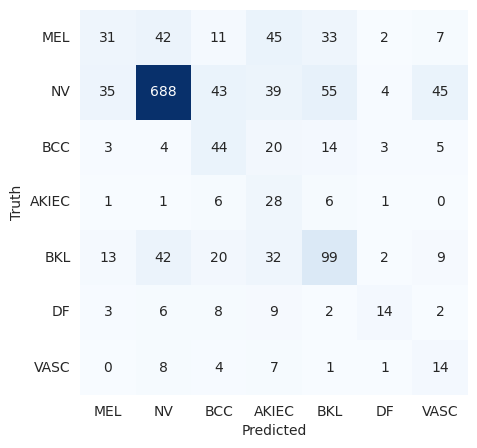

In [66]:
plot_conf_matrix(y_true, eff_untrans_pred)

In [77]:
get_scores(y_true, eff_untrans_pred)

=== Precision: 0.4100019947197082, Recall: 0.46240661769748953 ===


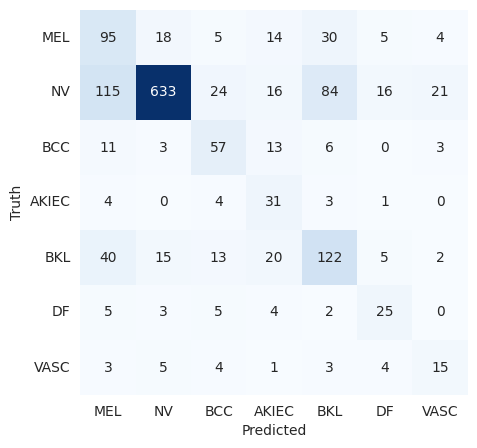

In [67]:
plot_conf_matrix(y_true, eff_aug_pred)

In [78]:
get_scores(y_true, eff_aug_pred)

=== Precision: 0.4818306461187872, Recall: 0.5921034113148443 ===


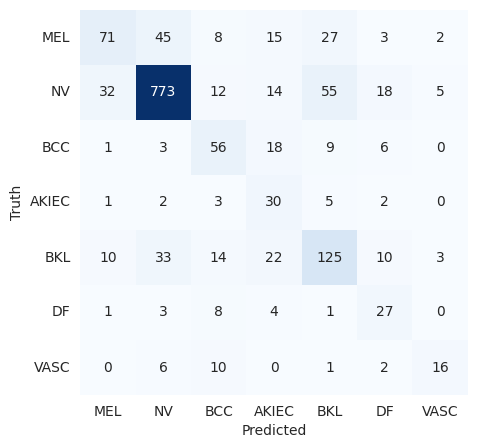

In [68]:
plot_conf_matrix(y_true, mnas_untrans_pred)

In [79]:
get_scores(y_true, mnas_untrans_pred)

=== Precision: 0.5534941114210202, Recall: 0.6017472514634502 ===


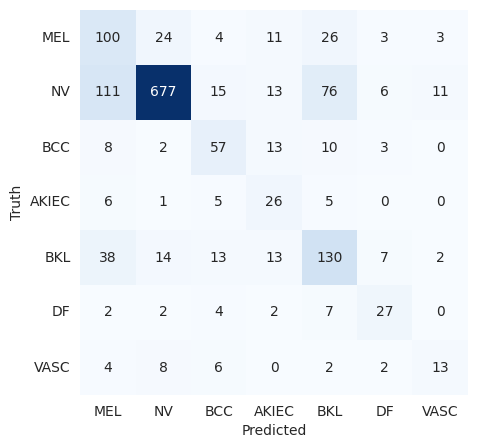

In [69]:
plot_conf_matrix(y_true, mnas_aug_pred)

In [80]:
get_scores(y_true, mnas_aug_pred)

=== Precision: 0.5288129836171697, Recall: 0.590181066251583 ===


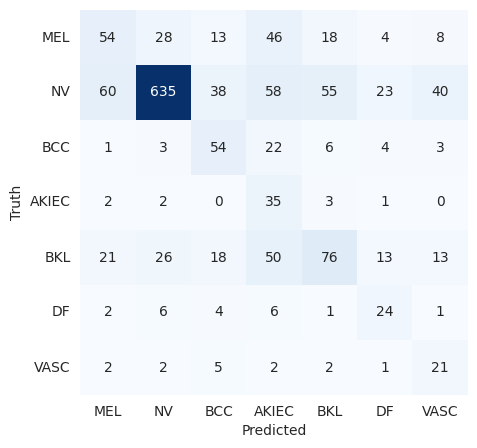

In [70]:
plot_conf_matrix(y_true, mobile_untrans_pred)

In [81]:
get_scores(y_true, mobile_untrans_pred)

=== Precision: 0.4161201763140138, Recall: 0.5578061343619163 ===


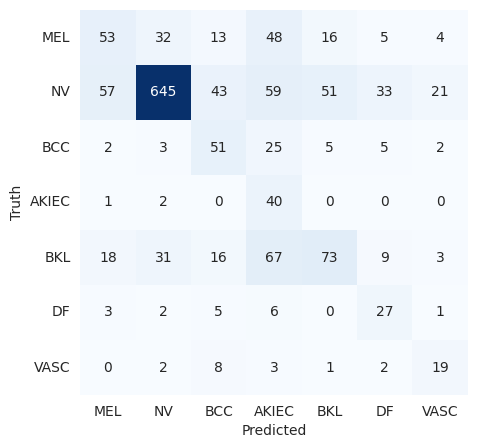

In [71]:
plot_conf_matrix(y_true, mobile_aug_pred)

In [82]:
get_scores(y_true, mobile_aug_pred)

=== Precision: 0.4349610905616913, Recall: 0.5701473098463853 ===


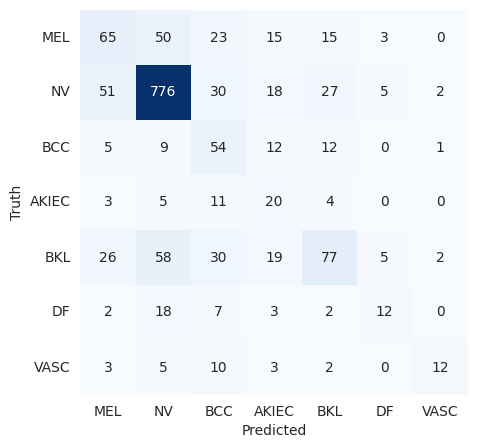

In [72]:
plot_conf_matrix(y_true, resnext_untrans_pred)

In [83]:
get_scores(y_true, resnext_untrans_pred)

=== Precision: 0.5073216296881653, Recall: 0.4642838418890152 ===


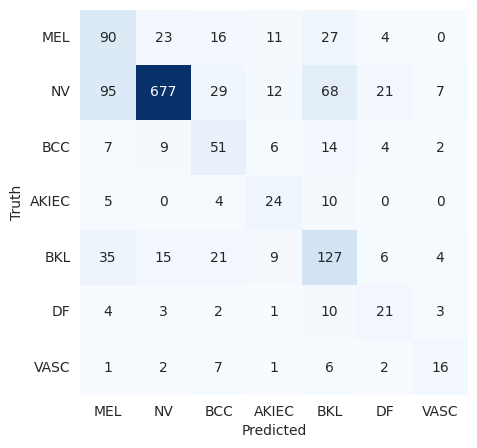

In [73]:
plot_conf_matrix(y_true, resnext_aug_pred)

In [84]:
get_scores(y_true, resnext_aug_pred)

=== Precision: 0.4889322468351921, Recall: 0.5567551341737323 ===
